In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.multitest import multipletests
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy import stats
from scipy.stats import boxcox
# # 设置工作目录
# project_root = "D:/asl"
# os.chdir(project_root)
# 确认当前工作目录
print("Current working directory:", os.getcwd())

Current working directory: D:\asl


In [2]:
# 使用pandas读取CSV文件
def _get_df(file_path, sheet=1):
    df = pd.read_excel(file_path, sheet_name=sheet)  # 修改这里  
    return df

In [3]:
file_path = './dataset/一些检查1.xlsx'
sheet5 = '血生化'
df_test  = _get_df(file_path, sheet5)


In [35]:
# 确保系统中有中文字体，并设置
 # 确保系统中有中文字体，并设置
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置中文字体为黑体
plt.rcParams['axes.unicode_minus'] = False    # 解决坐标轴负号显示问题  

In [5]:
df_test             

,姓名,患者编号,检查日期,医院名称,总蛋白（TP）,总蛋白（TP）(单位),临床意义,白蛋白（ALB）,白蛋白（ALB）(单位),临床意义.1,...,临床意义.20,离子钙（Ca）,离子钙（Ca）(单位),临床意义.21,磷 （P）,磷 （P）(单位),临床意义.22,乳酸,乳酸(单位),临床意义.23
0,张光容,202310160033,2023-06-26,四川大学华西医院上锦医院,57.7,g/L,NaN,37.7,g/L,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,孙亚军,202310160032,2023-02-07,南方医科大学珠江医院,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,李晓红,202310160031,2023-08-28,陕西省人民医院,NaN,NaN,NaN,39.8,g/L,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,李晓红,202310160031,2023-09-20,西安交通大学第一附属医院,61.4,g/L,NaN,35.5,g/L,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,刘德超,202310160030,2023-06-12,河北以岭医院,64.1,g/L,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.7,mmol/L,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7160,金冬浩,202009170002,2019-12-19,北京大学第三医院,NaN,NaN,ND,NaN,NaN,ND,...,正常,NaN,NaN,ND,NaN,NaN,ND,NaN,NaN,ND
7161,金冬浩,202009170002,2020-01-06,北京大学第三医院,65.1,g/L,NaN,39.1,g/L,NaN,...,NaN,2.23,mmol/L,NaN,1.53,mmol/L,NaN,ND,mmol/L,NaN
7162,尹佳,202009150002,2019-02-15,NaN,73.0,g/L,正常,44.0,g/L,正常,...,正常,2.36,mmol/L,正常,1.29,mmol/L,正常,NaN,NaN,NaN
7163,尹佳,202009150002,2019-02-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 结论


ALS（肌萎缩侧索硬化症）在性别之间确实存在一些差异，但这些差异的具体情况和机制仍在研究中。总体来说，以下几点是当前对ALS性别差异的理解：

发病率: 研究显示，男性患ALS的风险通常高于女性。这种差异可能与性别相关的生物学因素有关，例如激素水平或遗传因素。

疾病进展: 一些研究发现，女性患者的ALS可能进展得相对较慢，但这种观察并不是在所有研究中都一致的。具体的疾病进展可能受多种因素影响，包括遗传背景、生活方式和其他健康状况。

临床表现: 有研究指出，男女ALS患者的症状表现可能存在一些差异。例如，男性患者可能更倾向于表现出肌肉萎缩和无力，而女性患者则可能表现出更明显的肌肉痉挛和痛感。然而，这些差异可能因个体而异，并且研究结果并不总是统一的。

生物学机制: 性别差异可能与激素水平、免疫系统和其他生物学因素有关。这些因素可能影响疾病的发病机制和进展方式，但具体的机制仍在研究中。

# 进行异常指标检测

数据清洗

In [6]:
# test数据清洗
# 删除重复项
df_test.drop_duplicates(subset=['患者编号', '检查日期'], inplace=True)
# 保存处理后的数据
df_test.to_csv('processed_data.csv', index=False)
df_test


,姓名,患者编号,检查日期,医院名称,总蛋白（TP）,总蛋白（TP）(单位),临床意义,白蛋白（ALB）,白蛋白（ALB）(单位),临床意义.1,...,临床意义.20,离子钙（Ca）,离子钙（Ca）(单位),临床意义.21,磷 （P）,磷 （P）(单位),临床意义.22,乳酸,乳酸(单位),临床意义.23
0,张光容,202310160033,2023-06-26,四川大学华西医院上锦医院,57.7,g/L,NaN,37.7,g/L,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,孙亚军,202310160032,2023-02-07,南方医科大学珠江医院,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,李晓红,202310160031,2023-08-28,陕西省人民医院,NaN,NaN,NaN,39.8,g/L,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,李晓红,202310160031,2023-09-20,西安交通大学第一附属医院,61.4,g/L,NaN,35.5,g/L,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,刘德超,202310160030,2023-06-12,河北以岭医院,64.1,g/L,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.7,mmol/L,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7159,金冬浩,202009170002,2019-12-18,北京大学第三医院,65.2,g/L,正常,38.3,g/L,NaN,...,NaN,2.19,mmol/L,NaN,1.24,mmol/L,NaN,ND,mmol/L,NaN
7160,金冬浩,202009170002,2019-12-19,北京大学第三医院,NaN,NaN,ND,NaN,NaN,ND,...,正常,NaN,NaN,ND,NaN,NaN,ND,NaN,NaN,ND
7161,金冬浩,202009170002,2020-01-06,北京大学第三医院,65.1,g/L,NaN,39.1,g/L,NaN,...,NaN,2.23,mmol/L,NaN,1.53,mmol/L,NaN,ND,mmol/L,NaN
7162,尹佳,202009150002,2019-02-15,NaN,73.0,g/L,正常,44.0,g/L,正常,...,正常,2.36,mmol/L,正常,1.29,mmol/L,正常,NaN,NaN,NaN


In [7]:
# AR数据清洗

df_AR = pd.read_csv(os.path.join('dataset','id_AR_K.csv'))
df_AR
# 主要去除患者的AR记录小于三个月的数据
df_AR = df_AR[df_AR['月份差']>=3].dropna(subset='AR_K_Mon')
df_AR
# # 去除3sigmod外的行
# # 计算AR_K_Mon的均值和标准差  
# mean_value = df_AR['AR_K_Mon'].mean()  
# std_dev = df_AR['AR_K_Mon'].std()  
# # 确定3西格玛的上下限  
# lower_bound = mean_value - 3 * std_dev -  
# upper_bound = mean_value + 3 * std_dev  
# # 筛选在3西格玛范围内的值  
# df_AR = df_AR[(df_AR['AR_K_Mon'] >= lower_bound) & (df_AR['AR_K_Mon'] <= upper_bound)]  
# df_AR

,患者编号,最早时间,最早总分,最晚时间,最晚总分,Aspirin,天数差,月份差,总分差,AR_K_day,AR_K_Mon
0,202009150002,2020-10-20,39.0,2022-12-02,41.0,N,773,26,2.0,0.002587,0.076923
1,202009170003,2020-11-10,40.0,2022-11-20,20.0,N,740,24,-20.0,-0.027027,-0.833333
2,202009170004,2020-09-18,36.0,2021-10-02,22.0,N,379,13,-14.0,-0.036939,-1.076923
4,202009180001,2020-10-12,19.0,2023-04-01,1.0,N,901,30,-18.0,-0.019978,-0.600000
5,202011110002,2020-11-11,10.0,2022-02-22,18.0,N,468,15,8.0,0.017094,0.533333
...,...,...,...,...,...,...,...,...,...,...,...
4149,202402130010,2024-02-13,42.0,2024-05-13,42.0,N,90,3,0.0,0.000000,0.000000
4154,202402150037,2024-02-27,15.0,2024-05-10,14.0,N,73,3,-1.0,-0.013699,-0.333333
4166,202402200001,2018-02-01,23.0,2024-03-14,23.0,N,2233,73,0.0,0.000000,0.000000
4189,202402270012,2024-02-29,42.0,2024-05-02,39.0,N,63,3,-3.0,-0.047619,-1.000000


In [8]:
from sklearn.preprocessing import PowerTransformer

def yeo_johnson_transform(df, value_col):
    """
    对数据应用 Yeo-Johnson 变换。
    
    :param df: pandas DataFrame
    :param value_col: str, 待变换的列名
    :return: pandas DataFrame
    """
    pt = PowerTransformer(method='yeo-johnson')
    df[value_col] = pt.fit_transform(df[[value_col]])
    return df

In [9]:
# df_test clean

def test_clean(df, column_name):
    '''
    在完成单位换算后去除3sigmod之外的值
    
    :param df: 数据集
    :param column_name: 指标名 
    :return: df
    '''
    
    print("清洗前有{}条记录".format(df.shape))
    mean_value = df[column_name].mean()  
    std_dev = df[column_name].std()  
    # 确定3西格玛的上下限  
    lower_bound = mean_value - 3 * std_dev
    if(column_name=='低密度脂蛋白胆固醇（LDL-C）'):
        lower_bound = 10
    upper_bound = mean_value + 3 * std_dev  
    # 筛选在3西格玛范围内的值  
    df = df[(df['转换后的'+column_name] >= lower_bound) & (df['转换后的'+column_name] <= upper_bound)]  
    print("清洗后有{}条记录\n范围{},{}".format(df.shape,lower_bound,upper_bound))
    return df
    
    
    

In [10]:
# 观察df_test中提交多次记录的患者，暂未想到解决方案
# 假设df_test是你的DataFrame，且它有一个名为'编号'的列  
# 创建一个示例DataFrame  
# 使用groupby和transform来标记重复的编号  
# Test_Indicators = '磷酸肌酸激酶（CK）'
# df_test_same = df_test
# column_indic = ['姓名', '患者编号', '检查日期', Test_Indicators]
# df_test_same=df_test_same[column_indic].dropna(subset=Test_Indicators)
# df_test_same
# df_test_same['多次提交'] = df_test_same.groupby('患者编号')['患者编号'].transform('size') > 3  
# 
# # 筛选出所有编号重复的行  
# df_test_same = df_test_same[df_test_same['多次提交']]  
# df_test_same
# # 如果你不需要'编号重复'这一列，可以删除它  
# df_test_same.drop(columns=['编号重复'], inplace=True)  
#   
# print(df_test_same)

In [11]:
def get_conversion_factors(unit_dict):
    """
    请求用户输入每个单位对应的比例值，更新字典中的值。
    """
    print("Please input the conversion factors for each unit relative to the base unit.")
    base_unit = next(iter(unit_dict))  # 使用字典中的一个非空单位作为基准单位
    print(f"The base unit is: {base_unit}")

    # 请求用户输入每个单位相对于基准单位的换算比例
    for unit in unit_dict:
        if unit == base_unit:
            unit_dict[unit] = 1.0
        else:
            factor = float(input(f"Enter conversion factor for {unit} relative to {base_unit}: "))
            unit_dict[unit] = factor

    return unit_dict, base_unit

In [12]:
def is_abnormal(row, thresholds, Test_Indicators):
    """
    判断行是否异常的函数。
    
    """
    test_value = row['转换后的'+Test_Indicators]
    gender = row['性别']
 
    # 根据性别选择使用 M 列表或者 W 列表
    if gender == '男':
        value_list = thresholds['M']
    elif gender == '女':
        value_list = thresholds['W']
    else:
        return ''  # 如果性别不是 M 或 W，返回空字符串
    
    # 根据转换后的test_indic的值，确定区间并返回对应的标记
    for i in range(len(value_list) - 1):
        if value_list[i] <= test_value < value_list[i + 1]:
            return gender+str(value_list[i])+'-'+str(value_list[i+1]) # 返回对应数量的 'N'
        
        
    # 也可以用YN
    return 'l_out'  # 如果不在任何区间内，返回N 


# 主函数

In [13]:
def test_counts(Test_Indicators, Units,df_test):
    '''
    统计检测指标的临床意义，并画出分布函数
    
    :param Test_Indicators: 检测指标名 
    :param Units: 检测指标单位列名
    :param df_test: 数据集
    :return: 可选
    '''
    # 选取列
    column_indic = ['姓名', '患者编号', '检查日期', Test_Indicators, Units]
    # 强制转换 'Test_Indicator' 列的数据类型为数值型
    df_test[Test_Indicators] = pd.to_numeric(df_test[Test_Indicators], errors='coerce')
    df_test = df_test[column_indic].dropna(subset=Test_Indicators)
    # 进行单位换算
    # 获取 unit 列中的唯一类别值，并存储在一个字典中，初始值为 None
    unit_categories = {unit: None for unit in df_test[Units].unique()}
    
    # 获取换算因子
    unit_categories, base_unit = get_conversion_factors(unit_categories)
    
    # 根据换算因子重新计算 
    df_test['转换后的'+Test_Indicators] = df_test.apply(
        lambda row: row[Test_Indicators] * unit_categories[row[Units]], axis=1
    )
    # 创建统一单位列
    df_test['统一单位'] = df_test.apply(
        lambda row: base_unit, axis=1
    )
    
    # 清洗单位换算后的异常值
    df_test = test_clean(df_test, Test_Indicators)
    
    
    
    
    # 从基本信息中提取性别
    file_path = './dataset/患者基本信息.xlsx'
    sheet1 = '基本信息'
    df_gender = _get_df(file_path, sheet1)
    column_gender = ['患者编号', '性别']
    df_gender = df_gender[column_gender]
    # merge
    # 根据患者编号合并两个 DataFrame 
    merge_gender_test = pd.merge(df_gender, df_test, on='患者编号', how='right') 
    
    # 记录临床意义区间范围
    # 创建一个空字典
    thresholds = {'M': None, 'W': None}

    # 请求输入并将输入转换为列表
    thresholds['M'] = list(map(float, input("请输入 M 对应的列表（用逗号分隔每个元素）: ").split(',')))
    thresholds['W'] = list(map(float, input("请输入 W 对应的列表（用逗号分隔每个元素）: ").split(',')))

    print("生成的区间为:")
    print(thresholds)
    
    # 填入临床意义
    Test_cate = Test_Indicators+'临床意义'
    merge_gender_test[Test_cate] = merge_gender_test.apply(is_abnormal, axis=1,thresholds=thresholds, Test_Indicators=Test_Indicators)

    # 对应表中的区间，统计
    print(Test_Indicators)
    # 统计每个临床意义值出现的次数
    clinical_significance_counts = merge_gender_test[Test_cate].value_counts()

    # 计算每个临床意义值占总体的比例
    clinical_significance_ratios = merge_gender_test[Test_cate].value_counts(normalize=True)

    print("\nCounts of each 临床意义:")
    print(clinical_significance_counts)

    print("\nProportions of each 临床意义:")
    print(clinical_significance_ratios)
    
    # 绘制密度曲线
    df_to_sta = AR_distr_indic(merge_gender_test, Test_Indicators)
    
    # df_to_test的人数统计
    df_unique = df_to_sta.drop_duplicates(subset=['患者编号', Test_cate])
    
    # 2. 按“临床意义”分组并统计唯一患者数量
    to_sta_count = df_unique.groupby(Test_cate)['患者编号'].count().reset_index(name='患者人数')
    print(to_sta_count)
    
    # 统计检验
    sta_test(df_to_sta, Test_cate)
    
    # 返回结果表，可选
    return df_to_sta

In [14]:
def AR_distr_indic(merge_gender_test, Test_Indicators):
    '''
    绘制测试指标下的 AR 评分概率密度函数曲线。

    Parameters:
    merge_gender_test (DataFrame): 测试指标的数据集。
    Test_Indicators (list): 要分析的测试指标列的名称列表。

    Returns:
    None
    '''
    Test_cate = Test_Indicators+'临床意义'
    
    # df_AR = pd.read_csv(os.path.join('dataset','id_AR_K.csv'))
    
    df_merge_AR_indic = pd.merge(df_AR, merge_gender_test, on='患者编号', how="right").dropna(subset=['AR_K_Mon',Test_cate])
     # 绘制密度曲线  
    plt.figure(figsize=(15, 6)) 
    # 子图1: 概率密度函数曲线  
    ax1 = plt.subplot(1, 2, 1)  
    # 绘制每个分类的 KDE 曲线，并为每个分类设置标签
    for clin_sig, group in df_merge_AR_indic.groupby(Test_cate):
        sns.kdeplot(group['AR_K_Mon'], ax=ax1, label=clin_sig, fill=True, common_norm=False, alpha=0.5)
    
    ax1.set_title('AR月斜率分布')  
    ax1.set_xlabel('AR评分')  
    ax1.set_ylabel('Density')  
   
    # 手动设置图例标签
    # 获取图例的 handles 和 labels
    handles, labels = ax1.get_legend_handles_labels()
    # 仅在存在带有标签的艺术家时才显示图例
    if Test_cate in df_merge_AR_indic.columns and df_merge_AR_indic[Test_cate].nunique() > 1:
        ax1.legend(handles=handles, labels=labels, title=Test_cate, loc='upper left')

    # 子图2: 箱型图  
    ax2 = plt.subplot(1, 2, 2)  
    sns.boxplot(data=df_merge_AR_indic, x=Test_cate, y='AR_K_Mon', ax=ax2)  
    ax2.set_title('AR月斜率箱型图')  
    ax2.set_xlabel(Test_cate)  
    ax2.set_ylabel('AR评分')  
      
    plt.tight_layout()  # 调整子图之间的间距  
    plt.show() 
    
    return df_merge_AR_indic

# 检验函数

检验逻辑

In [15]:
from scipy.stats import f_oneway, ttest_ind

def sta_test(df_to_sta, category_col, value_col='AR_K_Mon',log_transform='True'):
    '''
    依据逻辑依次统计检验
    
    :param df_merge_AR_indic: 数据集 
    :param category_col: 种类名
    :param value_col: 值
    :return: none
    '''
    
    # yeo_johnson
    df_to_sta_log = df_to_sta.copy()
    df_to_sta_log = yeo_johnson_transform(df_to_sta_log, value_col)
        
    mean_values = df_to_sta.groupby(category_col)[value_col].mean()
    print(f"Mean values for different categories of {category_col} with {value_col}:")
    print(mean_values)
    # Check number of unique categories
    num_categories = len(df_to_sta[category_col].unique())
    # 正态性检验
    norm = normality_test(df_to_sta_log[value_col])
    qq_plot(df_to_sta_log[value_col])
    if norm == 1:
        if var_test(df_to_sta_log,category_col) ==1:
            if num_categories == 2:
                # t检验
                t_test(df_to_sta_log,category_col)
        
            else:
                # 单因素检验
                one_way_anova_print(df_to_sta_log,category_col)
                # 组间HSD检验
                tukey_hsd_test(df_to_sta_log,category_col)
        else:
            # welch_anova检验
            welch_anova_test(df_to_sta_log,category_col)
            # 组间GH 检验
            games_howell_test(df_to_sta_log,category_col)
    else:
        kruskal_wallis_test(df_to_sta,category_col)
        dunn_test(df_to_sta,category_col)
    

正态，方差齐性检验

In [16]:
# 1. 正态性检验
def normality_test(data):
    # Shapiro-Wilk检验
    stat, p_value = stats.shapiro(data)
    print(f"Shapiro-Wilk检验: 统计量={stat}, p值={p_value}")
    if p_value < 0.05:
        print("数据不符合正态分布") 
        return 0 
    else:
        print("数据符合正态分布")
        return 1

In [17]:
# Q-Q 图
def qq_plot(data, title='Q-Q'):
    stats.probplot(data, dist="norm", plot=plt)
    plt.title(title)
    plt.show()

In [18]:
from scipy.stats import levene  
def var_test(df,category_col, value_col='AR_K_Mon' ):
    '''
    levene方差检验
    
    :param df: 数据集 
    :param category_col: 分组类别 
    :param value_col: 
    :return: 检验结果
    '''
    print("levene方差检验")

    groups = {name: group[value_col].values for name, group in df.groupby(category_col)}  
  

    # 准备数据和分组标签  
    data_list = [group for group in groups.values()]  
    group_labels = np.concatenate([[label] * len(group) for label, group in groups.items()])  
  
    # 调用levene函数
    statistic, p_value = levene(*data_list)  # 使用*操作符解包列表  
  
    print(f'Levene Statistic: {statistic}')  
    print(f'P-value: {p_value}')  
    if p_value > 0.05:  
        print("方差齐性")  
        return 1
    else:  
        print("方差不齐")  
        return 0

均值检验

In [19]:
import pingouin as pg
def welch_anova_test(df, category_col, value_col='AR_K_Mon'):
    # 使用 pingouin 进行 Welch ANOVA
    welch_anova = pg.welch_anova(dv=value_col, between=category_col, data=df)
    print("welch_anova检验")
    print(welch_anova)
    p_value = welch_anova['p-unc'].values[0]
    if p_value < 0.05:
        print(f"检验结果显著 (p = {p_value:.4f})。可以拒绝零假设，说明组间均值存在显著差异。")
    else:
        print(f"检验结果不显著 (p = {p_value:.4f})。不能拒绝零假设，说明组间均值差异不显著。")

In [20]:
def games_howell_test(df, category_col, value_col='AR_K_Mon'):
    """
    Perform Games-Howell test for unequal variances.
    
    :param df: DataFrame containing the data
    :param category_col: Column name for the categories
    :param value_col: Column name for the values
    :return: DataFrame with significant pairs and adjusted p-values
    """
    # Perform one-way ANOVA to get p-values
    anova_result = stats.f_oneway(*[df[df[category_col] == group][value_col] for group in df[category_col].unique()])
    
    # Post-hoc test using Games-Howell
    comp = pairwise_tukeyhsd(df[value_col], df[category_col])
    results_df = pd.DataFrame(comp.summary().data[1:], columns=comp.summary().data[0])
    print("组间games_howell检验")
    print(results_df)
   

    
    

In [21]:
def tukey_hsd_test(df, category_col, value_col='AR_K_Mon'):
    """
    Perform Tukey HSD test for pairwise comparisons after ANOVA.
    
    :param df: DataFrame containing the data
    :param category_col: Column name for the categories
    :param value_col: Column name for the values
    :return: Tukey HSD result summary
    """
    # Ensure the data is in the correct format for Tukey's test
    data = df[value_col]
    groups = df[category_col]
    
    # Perform Tukey HSD test
    tukey_result = pairwise_tukeyhsd(endog=data, groups=groups, alpha=0.05)
    
    # Print and return the summary
    print(tukey_result.summary())
    
    return tukey_result.summary()



In [22]:
from scipy.stats import kruskal
def kruskal_wallis_test(df, category_col, value_col='AR_K_Mon'):
    '''
    非正态均值检验
    :param df: 
    :param category_col: 
    :param value_col: 
    :return: 
    '''
    # 获取分组数据
    groups = df[category_col].unique()
    group_data = [df[df[category_col] == group][value_col] for group in groups]
    
    # 执行 Kruskal-Wallis H 检验
    stat, p_value = kruskal(*group_data)
    
    print("Kruskal-Wallis H 检验")
    print(f"统计量: {stat:.4f}")
    print(f"p 值: {p_value:.4f}")
    if p_value < 0.05:
        print(f"检验结果显著 (p = {p_value:.4f})。可以拒绝零假设，说明组间均值存在显著差异。")
    else:
        print(f"检验结果不显著 (p = {p_value:.4f})。不能拒绝零假设，说明组间均值差异不显著。")

In [23]:
import scikit_posthocs as sp

def dunn_test(df, category_col, value_col='AR_K_Mon'):
    '''
    dunn_test事后检验
    :param df: 
    :param category_col: 
    :param value_col: 
    :return: 
    '''
    # 将数据组织成 DataFrame 格式
    data = {
        'values': df[value_col],
        'groups': df[category_col]
    }
    df_posthoc = pd.DataFrame(data)
    
    # 执行 Dunn's 检验
    dunn_result = sp.posthoc_dunn(df_posthoc, val_col='values', group_col='groups')
    
    print("Dunn's 检验")
    print(dunn_result)

In [24]:
def t_test(df, category_col, value_col='AR_K_Mon'):
    '''
    独立 t 检验
    
    :param df: 数据集
    :param category_col: 种类列名
    :param value_col: 值列名
    :return: 显著性检验结果，显著返回1，不显著返回0
    '''
    # 按种类列分组
    print("t检验")
    groups = {}
    for name, group in df.groupby(category_col):
        groups[name] = group[value_col]

    # 执行独立 t 检验
    t_statistic, p_value = ttest_ind(*groups.values())

    # 根据显著性水平（例如，0.05）判断显著性
    alpha = 0.05
    if p_value < alpha:
        significance = '存在显著差异'
        result = 1
    else:
        significance = '不存在显著差异'
        result = 0

    # 打印结果
    print(f'独立 t 检验结果:')
    print(f'统计量: {t_statistic:.4f}')
    print(f'P值: {p_value:.4f}')
    print(f'均值之间 {significance}')

    return result

In [25]:
def one_way_anova_print(df, category_col, value_col='AR_K_Mon'):
    '''
    单因素方差检验
    :param df: 数据集
    :param category_col: 种类名 
    :param value_col: 分值
    :return: 显著返回1
    '''
    groups = {}
    for name, group in df.groupby(category_col):
        groups[name] = group[value_col]

    # 执行一元方差分析
    f_statistic, p_value = f_oneway(*groups.values())

    # 根据 p-value 判断显著性
    alpha = 0.05
    if p_value < alpha:
        significance = '存在显著差异'
    else:
        significance = '不存在显著差异'

    # 打印结果
    print('单因素方差检验')
    print(f'F-statistic: {f_statistic:.4f}')
    print(f'P-value: {p_value:.4f}')
    print(f'均值之间 {significance}')
    
    if p_value < alpha:
        return 1
    else:
        return 0

磷酸肌酸激酶（CK）统计

Please input the conversion factors for each unit relative to the base unit.
The base unit is: IU/L
清洗前有(3325, 7)条记录
清洗后有(3310, 7)条记录
范围-1507.6531778637461,2183.3687929013404


D:\asl\venv\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


生成的区间为:
{'M': [0.0, 38.0, 174.0], 'W': [0.0, 26.0, 140.0]}
磷酸肌酸激酶（CK）

Counts of each 临床意义:
磷酸肌酸激酶（CK）临床意义
l_out          2206
男38.0-174.0     552
女26.0-140.0     493
男0.0-38.0        37
女0.0-26.0        22
Name: count, dtype: int64

Proportions of each 临床意义:
磷酸肌酸激酶（CK）临床意义
l_out          0.666465
男38.0-174.0    0.166767
女26.0-140.0    0.148943
男0.0-38.0      0.011178
女0.0-26.0      0.006647
Name: proportion, dtype: float64


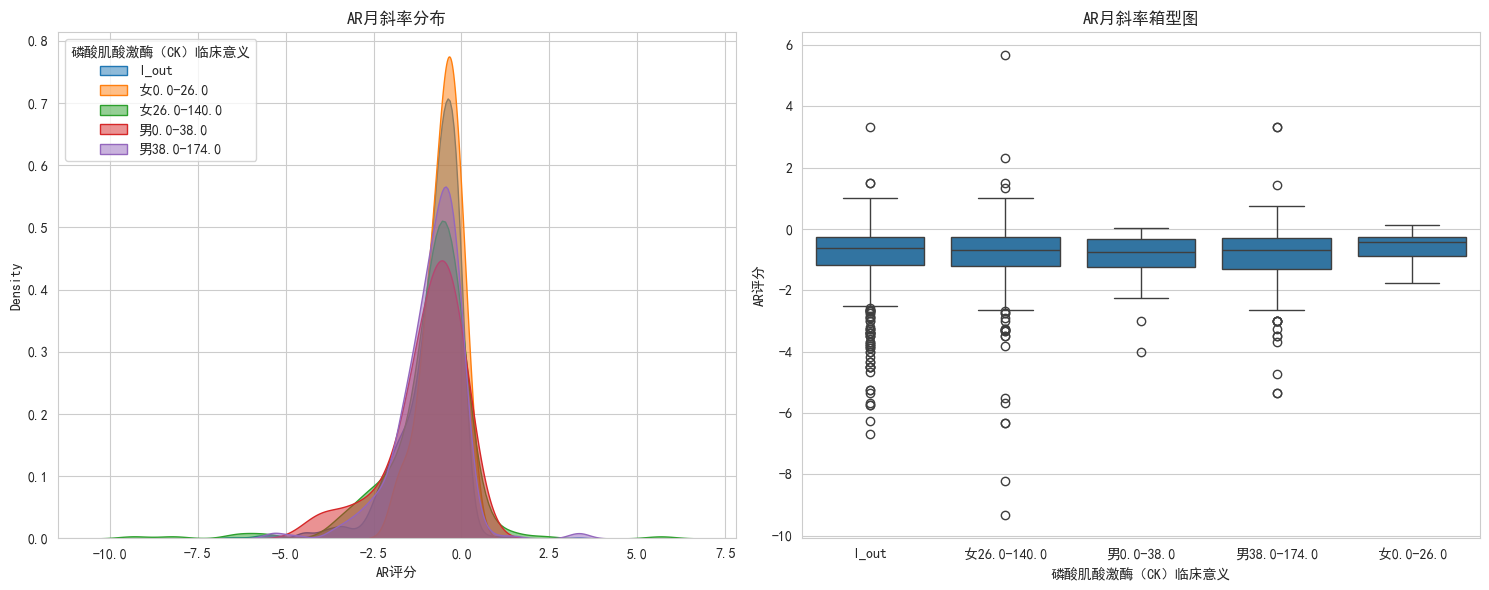

  磷酸肌酸激酶（CK）临床意义  患者人数
0          l_out   858
1      女0.0-26.0    14
2    女26.0-140.0   234
3      男0.0-38.0    21
4    男38.0-174.0   253
Mean values for different categories of 磷酸肌酸激酶（CK）临床意义 with AR_K_Mon:
磷酸肌酸激酶（CK）临床意义
l_out         -0.852947
女0.0-26.0     -0.537923
女26.0-140.0   -0.942794
男0.0-38.0     -1.006001
男38.0-174.0   -0.879711
Name: AR_K_Mon, dtype: float64
Shapiro-Wilk检验: 统计量=0.8380351481134882, p值=4.3116735895392534e-41
数据不符合正态分布


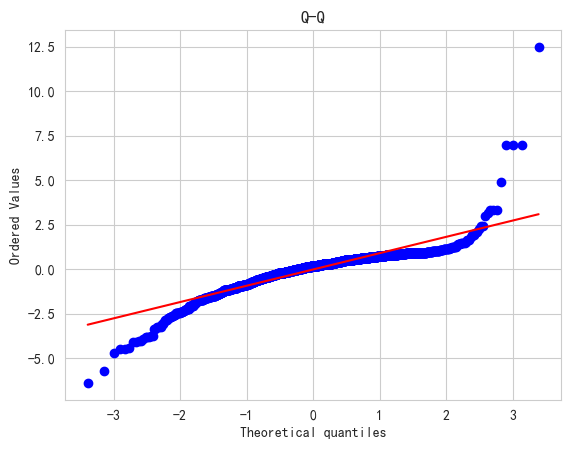

Kruskal-Wallis H 检验
统计量: 4.0577
p 值: 0.3983
检验结果不显著 (p = 0.3983)。不能拒绝零假设，说明组间均值差异不显著。
Dunn's 检验
                l_out  女0.0-26.0  女26.0-140.0  男0.0-38.0  男38.0-174.0
l_out        1.000000   0.169447     0.506713   0.617061     0.208836
女0.0-26.0    0.169447   1.000000     0.131283   0.167443     0.099644
女26.0-140.0  0.506713   0.131283     1.000000   0.765982     0.659900
男0.0-38.0    0.617061   0.167443     0.765982   1.000000     0.888371
男38.0-174.0  0.208836   0.099644     0.659900   0.888371     1.000000


,患者编号,最早时间,最早总分,最晚时间,最晚总分,Aspirin,天数差,月份差,总分差,AR_K_day,AR_K_Mon,性别,姓名,检查日期,磷酸肌酸激酶（CK）,磷酸肌酸激酶（CK）(单位),转换后的磷酸肌酸激酶（CK）,统一单位,磷酸肌酸激酶（CK）临床意义
0,202310160033,2023-12-16,39.0,2024-04-25,39.0,N,131.0,4.0,0.0,0.000000,0.000000,女,张光容,2023-06-26,473.0,IU/L,473.0,IU/L,l_out
1,202310160030,2023-11-13,30.0,2024-05-07,27.0,N,176.0,6.0,-3.0,-0.017045,-0.500000,男,刘德超,2023-06-12,295.0,U/L,295.0,IU/L,l_out
3,202310160013,2023-10-16,41.0,2024-01-30,40.0,N,106.0,3.0,-1.0,-0.009434,-0.333333,女,何芳,2023-08-10,79.0,U/L,79.0,IU/L,女26.0-140.0
7,202310130009,2023-10-16,39.0,2024-04-13,37.0,N,180.0,6.0,-2.0,-0.011111,-0.333333,男,全位师,2023-02-16,710.0,U/L,710.0,IU/L,l_out
10,202310110014,2023-10-12,32.0,2024-05-11,15.0,N,212.0,7.0,-17.0,-0.080189,-2.428571,男,马超,2023-07-13,543.0,U/L,543.0,IU/L,l_out
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3297,202011150001,2020-11-15,33.0,2023-11-11,13.0,N,1091.0,36.0,-20.0,-0.018332,-0.555556,男,马可,2020-10-14,931.0,U/L,931.0,IU/L,l_out
3298,202011150001,2020-11-15,33.0,2023-11-11,13.0,N,1091.0,36.0,-20.0,-0.018332,-0.555556,男,马可,2019-11-08,646.0,U/L,646.0,IU/L,l_out
3299,202011130001,2020-11-19,21.0,2021-07-09,0.0,N,232.0,8.0,-21.0,-0.090517,-2.625000,女,瞿婷婷,2020-05-09,32.0,U/L,32.0,IU/L,女26.0-140.0
3305,202009170003,2020-11-10,40.0,2022-11-20,20.0,N,740.0,24.0,-20.0,-0.027027,-0.833333,男,武杰,2018-11-30,393.0,U/L,393.0,IU/L,l_out


In [29]:
# file_path = './dataset/一些检查1.xlsx'2
# sheet5 = '血生化'
# df_bio_blood_test = _get_df(file_path, sheet5)
# 男性：约 38-174 U/L（单位/升）
# 女性：约 26-140 U/L（单位/升）
# CK 偏低的原因
# 肌肉萎缩或虚弱：
# 
# 慢性肌肉疾病：如长期的肌肉无力或萎缩症。
# 长期卧床：导致肌肉质量和功能下降，从而降低 CK 水平。
# 磷酸肌酸激酶（CK）过低在临床上相对较为少见，且通常不具有明确的临床意义。然而，其偏低可能由多种因素导致，以下是对此现象的详细分析：
# CK 水平通常正常或略高：
# 
# 在 ALS 患者中，CK 水平通常处于正常范围或略高。虽然 ALS 主要影响神经系统，但肌肉损伤和退化可能会导致 CK 水平轻微升高。
# CK 的升高通常不是 ALS 的主要特征，因为 ALS 的病理变化主要发生在运动神经元而非肌肉本身。
# CK 升高的可能原因：继发性肌肉损伤：ALS 患者由于肌肉无力和不正常的运动模式，可能会导致继发性肌肉损伤，进而引起 CK 水平升高。一些 ALS 患者可能会有其他肌肉疾病或创伤，这可能导致 CK 水平升高。
Test_Indicators, Units = ['磷酸肌酸激酶（CK）', '磷酸肌酸激酶（CK）(单位)']
df_ck = test_counts(Test_Indicators, Units,df_test)
df_ck

In [30]:
df_ck.to_csv('df_ck.csv', encoding='utf_8_sig')

0,-0.9

总胆固醇（TC）

Please input the conversion factors for each unit relative to the base unit.
The base unit is: mmol/L
清洗前有(2674, 7)条记录
清洗后有(2668, 7)条记录
范围-47.55047955012181,59.06130976702532


D:\asl\venv\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


生成的区间为:
{'M': [0.0, 5.17, 6.2], 'W': [0.0, 5.17, 6.2]}
总胆固醇（TC）

Counts of each 临床意义:
总胆固醇（TC）临床意义
男0.0-5.17    968
女0.0-5.17    528
男5.17-6.2    477
l_out        361
女5.17-6.2    334
Name: count, dtype: int64

Proportions of each 临床意义:
总胆固醇（TC）临床意义
男0.0-5.17    0.362819
女0.0-5.17    0.197901
男5.17-6.2    0.178786
l_out        0.135307
女5.17-6.2    0.125187
Name: proportion, dtype: float64


C:\Users\徐文韬\AppData\Local\Temp\ipykernel_20940\2659599088.py:43: UserWarning: Glyph 35780 (\N{CJK UNIFIED IDEOGRAPH-8BC4}) missing from font(s) Arial.
  plt.tight_layout()  # 调整子图之间的间距
C:\Users\徐文韬\AppData\Local\Temp\ipykernel_20940\2659599088.py:43: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) Arial.
  plt.tight_layout()  # 调整子图之间的间距
C:\Users\徐文韬\AppData\Local\Temp\ipykernel_20940\2659599088.py:43: UserWarning: Glyph 26376 (\N{CJK UNIFIED IDEOGRAPH-6708}) missing from font(s) Arial.
  plt.tight_layout()  # 调整子图之间的间距
C:\Users\徐文韬\AppData\Local\Temp\ipykernel_20940\2659599088.py:43: UserWarning: Glyph 26012 (\N{CJK UNIFIED IDEOGRAPH-659C}) missing from font(s) Arial.
  plt.tight_layout()  # 调整子图之间的间距
C:\Users\徐文韬\AppData\Local\Temp\ipykernel_20940\2659599088.py:43: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from font(s) Arial.
  plt.tight_layout()  # 调整子图之间的间距
C:\Users\徐文韬\AppData\Local\Temp\ipykernel_20940\2659599088.py:43: User

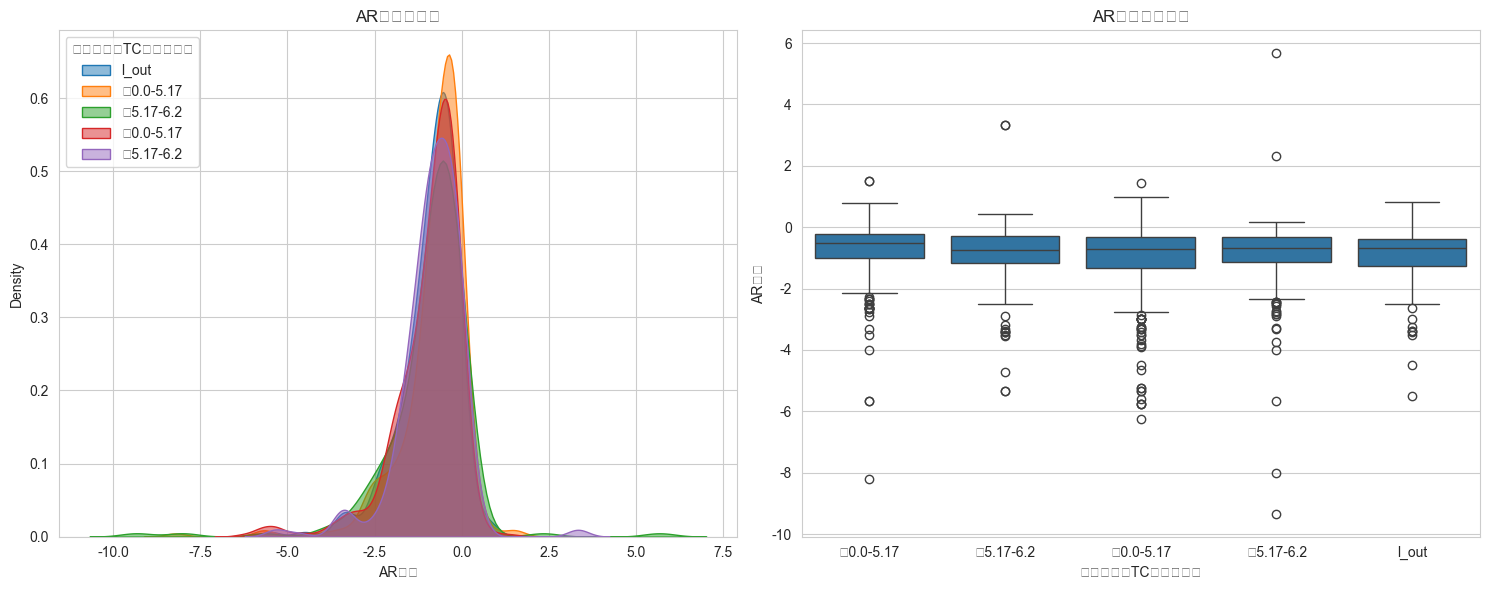

  总胆固醇（TC）临床意义  患者人数
0        l_out   173
1    女0.0-5.17   249
2    女5.17-6.2   164
3    男0.0-5.17   454
4    男5.17-6.2   234
Mean values for different categories of 总胆固醇（TC）临床意义 with AR_K_Mon:
总胆固醇（TC）临床意义
l_out       -0.927875
女0.0-5.17   -0.783031
女5.17-6.2   -0.932988
男0.0-5.17   -0.967450
男5.17-6.2   -0.855954
Name: AR_K_Mon, dtype: float64
Shapiro-Wilk检验: 统计量=0.8360370012037818, p值=1.0719570394785759e-37
数据不符合正态分布


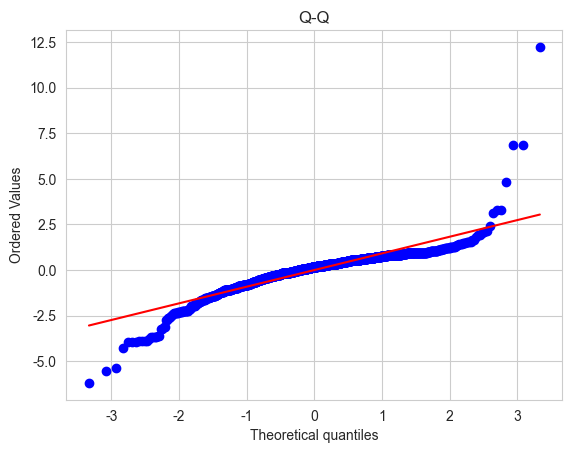

Kruskal-Wallis H 检验
统计量: 13.4265
p 值: 0.0094
检验结果显著 (p = 0.0094)。可以拒绝零假设，说明组间均值存在显著差异。
Dunn's 检验
              l_out  女0.0-5.17  女5.17-6.2  男0.0-5.17  男5.17-6.2
l_out      1.000000   0.003317   0.418207   0.799507   0.408164
女0.0-5.17  0.003317   1.000000   0.048149   0.000663   0.023958
女5.17-6.2  0.418207   0.048149   1.000000   0.470280   0.955016
男0.0-5.17  0.799507   0.000663   0.470280   1.000000   0.451971
男5.17-6.2  0.408164   0.023958   0.955016   0.451971   1.000000


,患者编号,最早时间,最早总分,最晚时间,最晚总分,Aspirin,天数差,月份差,总分差,AR_K_day,AR_K_Mon,性别,姓名,检查日期,总胆固醇（TC）,总胆固醇（TC）(单位),转换后的总胆固醇（TC）,统一单位,总胆固醇（TC）临床意义
1,202310160013,2023-10-16,41.0,2024-01-30,40.0,N,106.0,3.0,-1.0,-0.009434,-0.333333,女,何芳,2023-08-10,4.89,mmol/L,4.89,mmol/L,女0.0-5.17
3,202310130009,2023-10-16,39.0,2024-04-13,37.0,N,180.0,6.0,-2.0,-0.011111,-0.333333,男,全位师,2023-02-16,5.55,mmol/L,5.55,mmol/L,男5.17-6.2
4,202310110014,2023-10-12,32.0,2024-05-11,15.0,N,212.0,7.0,-17.0,-0.080189,-2.428571,男,马超,2023-07-13,4.93,mmol/L,4.93,mmol/L,男0.0-5.17
9,202310090010,2023-10-10,35.0,2024-02-27,31.0,N,140.0,4.0,-4.0,-0.028571,-1.000000,男,杨拴学,2023-08-22,4.42,mmol/L,4.42,mmol/L,男0.0-5.17
10,202310090010,2023-10-10,35.0,2024-02-27,31.0,N,140.0,4.0,-4.0,-0.028571,-1.000000,男,杨拴学,2023-08-04,4.13,mmol/L,4.13,mmol/L,男0.0-5.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2660,202009170004,2020-09-18,36.0,2021-10-02,22.0,N,379.0,13.0,-14.0,-0.036939,-1.076923,男,管亚彬,2020-11-04,5.53,mmol/L,5.53,mmol/L,男5.17-6.2
2661,202009170004,2020-09-18,36.0,2021-10-02,22.0,N,379.0,13.0,-14.0,-0.036939,-1.076923,男,管亚彬,2019-06-18,6.04,mmol/L,6.04,mmol/L,男5.17-6.2
2662,202009170003,2020-11-10,40.0,2022-11-20,20.0,N,740.0,24.0,-20.0,-0.027027,-0.833333,男,武杰,2018-11-30,4.59,mmol/L,4.59,mmol/L,男0.0-5.17
2663,202009170003,2020-11-10,40.0,2022-11-20,20.0,N,740.0,24.0,-20.0,-0.027027,-0.833333,男,武杰,2017-12-09,4.00,mmol/L,4.00,mmol/L,男0.0-5.17


In [31]:
# 生成的区间为:
# {'M': [0.0, 5.17, 6.2], 'W': [0.0, 5.17, 6.2]}
# 胆固醇: 一些研究表明，胆固醇水平可能与ALS的风险和疾病进展有关。胆固醇是细胞膜的一个重要组成部分，对神经系统的健康也有影响。某些研究发现胆固醇代谢异常可能与ALS的发病机制有关，但这一领域的证据尚不充分，需要更多的研究来明确胆固醇水平与ALS之间的关系。
# 体重: 体重和体重变化也可能与ALS有关。一些研究发现，ALS患者在疾病早期可能会经历体重下降，而体重过低可能与疾病的进展速度有关。体重增加和保持正常体重可能有助于改善ALS患者的生活质量和整体健康，但研究还在继续探索体重管理对ALS的具体影响。
Test_Indicators, Units = ['总胆固醇（TC）', '总胆固醇（TC）(单位)']
df_tc = test_counts(Test_Indicators, Units,df_test)
df_tc

In [32]:
df_tc.to_csv('df_tc.csv',encoding='utf-8-sig')

In [31]:
df_tc[df_tc['总胆固醇（TC）临床意义']=='女0.0-5.17'].to_csv('df_tc_w.csv',encoding='utf-8-sig')


甘油三酯 （TG）

Please input the conversion factors for each unit relative to the base unit.
The base unit is: mmol/L
清洗前有(2841, 7)条记录
清洗后有(2833, 7)条记录
范围-37.55189696953769,42.610425656619704


D:\asl\venv\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


生成的区间为:
{'M': [0.0, 1.7, 2.2], 'W': [0.0, 1.7, 2.2]}
甘油三酯 （TG）

Counts of each 临床意义:
甘油三酯 （TG）临床意义
男0.0-1.7    844
l_out       819
女0.0-1.7    618
男1.7-2.2    364
女1.7-2.2    188
Name: count, dtype: int64

Proportions of each 临床意义:
甘油三酯 （TG）临床意义
男0.0-1.7    0.297917
l_out       0.289093
女0.0-1.7    0.218143
男1.7-2.2    0.128486
女1.7-2.2    0.066361
Name: proportion, dtype: float64


C:\Users\徐文韬\AppData\Local\Temp\ipykernel_20940\2659599088.py:43: UserWarning: Glyph 35780 (\N{CJK UNIFIED IDEOGRAPH-8BC4}) missing from font(s) Arial.
  plt.tight_layout()  # 调整子图之间的间距
C:\Users\徐文韬\AppData\Local\Temp\ipykernel_20940\2659599088.py:43: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) Arial.
  plt.tight_layout()  # 调整子图之间的间距
C:\Users\徐文韬\AppData\Local\Temp\ipykernel_20940\2659599088.py:43: UserWarning: Glyph 26376 (\N{CJK UNIFIED IDEOGRAPH-6708}) missing from font(s) Arial.
  plt.tight_layout()  # 调整子图之间的间距
C:\Users\徐文韬\AppData\Local\Temp\ipykernel_20940\2659599088.py:43: UserWarning: Glyph 26012 (\N{CJK UNIFIED IDEOGRAPH-659C}) missing from font(s) Arial.
  plt.tight_layout()  # 调整子图之间的间距
C:\Users\徐文韬\AppData\Local\Temp\ipykernel_20940\2659599088.py:43: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from font(s) Arial.
  plt.tight_layout()  # 调整子图之间的间距
C:\Users\徐文韬\AppData\Local\Temp\ipykernel_20940\2659599088.py:43: User

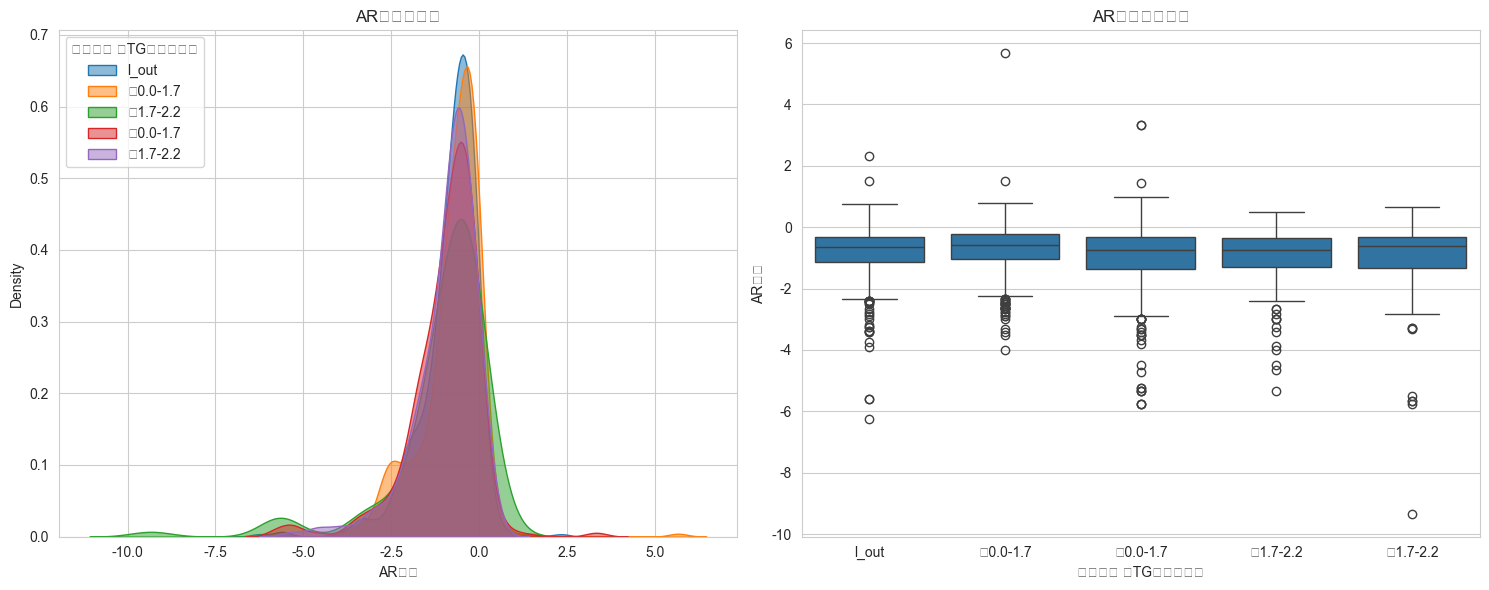

  甘油三酯 （TG）临床意义  患者人数
0         l_out   358
1      女0.0-1.7   290
2      女1.7-2.2    92
3      男0.0-1.7   405
4      男1.7-2.2   182
Mean values for different categories of 甘油三酯 （TG）临床意义 with AR_K_Mon:
甘油三酯 （TG）临床意义
l_out      -0.832282
女0.0-1.7   -0.757997
女1.7-2.2   -1.069805
男0.0-1.7   -0.977989
男1.7-2.2   -0.943624
Name: AR_K_Mon, dtype: float64
Shapiro-Wilk检验: 统计量=0.8499356095381447, p值=2.076347460707213e-37
数据不符合正态分布


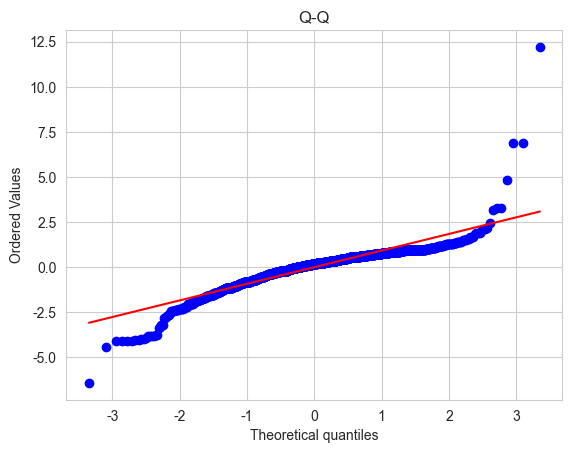

Kruskal-Wallis H 检验
统计量: 17.1347
p 值: 0.0018
检验结果显著 (p = 0.0018)。可以拒绝零假设，说明组间均值存在显著差异。
Dunn's 检验
             l_out  女0.0-1.7  女1.7-2.2  男0.0-1.7  男1.7-2.2
l_out     1.000000  0.088039  0.798851  0.020064  0.142441
女0.0-1.7  0.088039  1.000000  0.195428  0.000109  0.005619
女1.7-2.2  0.798851  0.195428  1.000000  0.269383  0.443949
男0.0-1.7  0.020064  0.000109  0.269383  1.000000  0.730500
男1.7-2.2  0.142441  0.005619  0.443949  0.730500  1.000000


,患者编号,最早时间,最早总分,最晚时间,最晚总分,Aspirin,天数差,月份差,总分差,AR_K_day,AR_K_Mon,性别,姓名,检查日期,甘油三酯 （TG）,甘油三酯 （TG）(单位),转换后的甘油三酯 （TG）,统一单位,甘油三酯 （TG）临床意义
2,202310160030,2023-11-13,30.0,2024-05-07,27.0,N,176.0,6.0,-3.0,-0.017045,-0.500000,男,刘德超,2023-06-12,2.76,mmol/L,2.76,mmol/L,l_out
4,202310160013,2023-10-16,41.0,2024-01-30,40.0,N,106.0,3.0,-1.0,-0.009434,-0.333333,女,何芳,2023-08-10,0.73,mmol/L,0.73,mmol/L,女0.0-1.7
6,202310130009,2023-10-16,39.0,2024-04-13,37.0,N,180.0,6.0,-2.0,-0.011111,-0.333333,男,全位师,2023-02-16,3.67,mmol/L,3.67,mmol/L,l_out
8,202310110014,2023-10-12,32.0,2024-05-11,15.0,N,212.0,7.0,-17.0,-0.080189,-2.428571,男,马超,2023-07-13,1.24,mmol/L,1.24,mmol/L,男0.0-1.7
13,202310090010,2023-10-10,35.0,2024-02-27,31.0,N,140.0,4.0,-4.0,-0.028571,-1.000000,男,杨拴学,2023-08-22,2.00,mmol/L,2.00,mmol/L,男1.7-2.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2817,202011130001,2020-11-19,21.0,2021-07-09,0.0,N,232.0,8.0,-21.0,-0.090517,-2.625000,女,瞿婷婷,NaN,1.00,mmol/L,1.00,mmol/L,女0.0-1.7
2826,202009170004,2020-09-18,36.0,2021-10-02,22.0,N,379.0,13.0,-14.0,-0.036939,-1.076923,男,管亚彬,2020-11-04,3.77,mmol/L,3.77,mmol/L,l_out
2827,202009170003,2020-11-10,40.0,2022-11-20,20.0,N,740.0,24.0,-20.0,-0.027027,-0.833333,男,武杰,2018-11-30,2.53,mmol/L,2.53,mmol/L,l_out
2828,202009170003,2020-11-10,40.0,2022-11-20,20.0,N,740.0,24.0,-20.0,-0.027027,-0.833333,男,武杰,2017-12-09,2.25,mmol/L,2.25,mmol/L,l_out


In [33]:
# {'M': [0.0, 1.7, 2.2], 'W': [0.0, 1.7, 2.2]}
# 甘油三酯与ALS的关系: 目前的研究对甘油三酯与ALS的直接关系还没有明确的结论。有一些研究探讨了脂质代谢在ALS中的作用，但没有找到明确的证据表明甘油三酯水平直接影响ALS的发生或进展。
# 正常: 少于 150 mg/dL（1.7 mmol/L）
# 边际升高: 150-199 mg/dL（1.7-2.2 mmol/L）
# 高: 200-499 mg/dL（2.3-5.6 mmol/L）
# 非常高: 500 mg/dL 以上（5.6 mmol/L 以上）

Test_Indicators, Units = ['甘油三酯 （TG）', '甘油三酯 （TG）(单位)']
df_tg = test_counts(Test_Indicators, Units,df_test)
df_tg

In [34]:
df_tg.to_csv('df_tg.csv',encoding='utf-8-sig')

In [34]:
df_tg[df_tg['甘油三酯 （TG）临床意义']=='女0.0-1.7'].to_csv('df_tg_w.csv',encoding='utf-8-sig')

低密度脂蛋白胆固醇（LDL-C）


Please input the conversion factors for each unit relative to the base unit.
The base unit is: mg/dL
清洗前有(2753, 7)条记录
清洗后有(2640, 7)条记录
范围10,814.9449098636717


D:\asl\venv\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


生成的区间为:
{'M': [0.0, 129.0, 159.0], 'W': [0.0, 129.0, 159.0]}
低密度脂蛋白胆固醇（LDL-C）

Counts of each 临床意义:
低密度脂蛋白胆固醇（LDL-C）临床意义
男0.0-129.0      999
女0.0-129.0      594
男129.0-159.0    457
l_out           320
女129.0-159.0    270
Name: count, dtype: int64

Proportions of each 临床意义:
低密度脂蛋白胆固醇（LDL-C）临床意义
男0.0-129.0      0.378409
女0.0-129.0      0.225000
男129.0-159.0    0.173106
l_out           0.121212
女129.0-159.0    0.102273
Name: proportion, dtype: float64


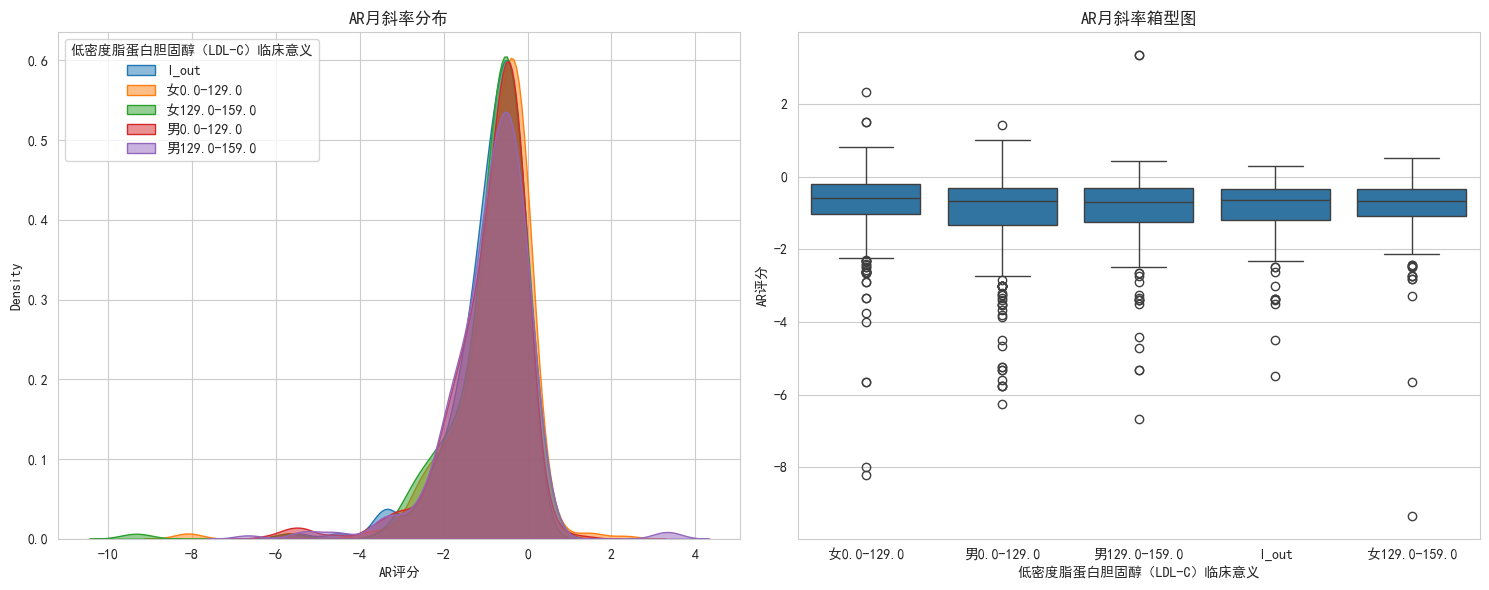

  低密度脂蛋白胆固醇（LDL-C）临床意义  患者人数
0                l_out   152
1           女0.0-129.0   288
2         女129.0-159.0   133
3           男0.0-129.0   480
4         男129.0-159.0   236
Mean values for different categories of 低密度脂蛋白胆固醇（LDL-C）临床意义 with AR_K_Mon:
低密度脂蛋白胆固醇（LDL-C）临床意义
l_out          -0.924550
女0.0-129.0     -0.815993
女129.0-159.0   -0.909616
男0.0-129.0     -0.949145
男129.0-159.0   -0.917496
Name: AR_K_Mon, dtype: float64
Shapiro-Wilk检验: 统计量=0.8788184788841685, p值=1.0883733208461961e-33
数据不符合正态分布


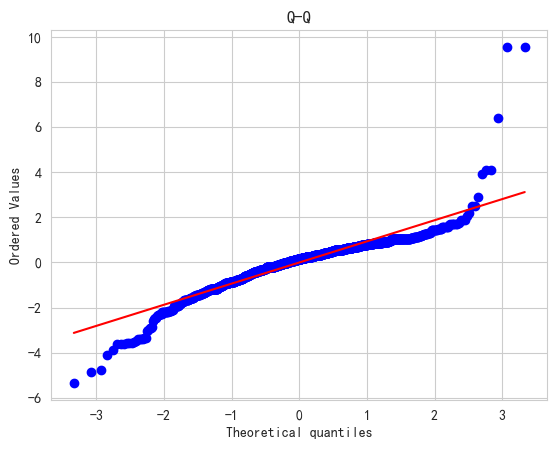

Kruskal-Wallis H 检验
统计量: 9.5129
p 值: 0.0495
检验结果显著 (p = 0.0495)。可以拒绝零假设，说明组间均值存在显著差异。
Dunn's 检验
                 l_out  女0.0-129.0  女129.0-159.0  男0.0-129.0  男129.0-159.0
l_out         1.000000    0.026423      0.559364    0.895339      0.853963
女0.0-129.0    0.026423    1.000000      0.143871    0.004836      0.023425
女129.0-159.0  0.559364    0.143871      1.000000    0.559949      0.649604
男0.0-129.0    0.895339    0.004836      0.559949    1.000000      0.929579
男129.0-159.0  0.853963    0.023425      0.649604    0.929579      1.000000


,患者编号,最早时间,最早总分,最晚时间,最晚总分,Aspirin,天数差,月份差,总分差,AR_K_day,AR_K_Mon,性别,姓名,检查日期,低密度脂蛋白胆固醇（LDL-C）,低密度脂蛋白胆固醇（LDL-C）(单位),转换后的低密度脂蛋白胆固醇（LDL-C）,统一单位,低密度脂蛋白胆固醇（LDL-C）临床意义
1,202310160013,2023-10-16,41.0,2024-01-30,40.0,N,106.0,3.0,-1.0,-0.009434,-0.333333,女,何芳,2023-08-10,2.31,mmol/L,89.3277,mg/dL,女0.0-129.0
2,202310110014,2023-10-12,32.0,2024-05-11,15.0,N,212.0,7.0,-17.0,-0.080189,-2.428571,男,马超,2023-07-13,3.02,mmol/L,116.7834,mg/dL,男0.0-129.0
5,202310090010,2023-10-10,35.0,2024-02-27,31.0,N,140.0,4.0,-4.0,-0.028571,-1.000000,男,杨拴学,2023-08-22,2.18,mmol/L,84.3006,mg/dL,男0.0-129.0
6,202310090010,2023-10-10,35.0,2024-02-27,31.0,N,140.0,4.0,-4.0,-0.028571,-1.000000,男,杨拴学,2023-08-04,1.88,mmol/L,72.6996,mg/dL,男0.0-129.0
8,202310080009,2023-10-08,46.0,2024-05-05,46.0,N,210.0,7.0,0.0,0.000000,0.000000,男,罗莉莉,2023-07-01,2.92,mmol/L,112.9164,mg/dL,男0.0-129.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2632,202009170004,2020-09-18,36.0,2021-10-02,22.0,N,379.0,13.0,-14.0,-0.036939,-1.076923,男,管亚彬,2020-11-04,3.53,mmol/L,136.5051,mg/dL,男129.0-159.0
2633,202009170004,2020-09-18,36.0,2021-10-02,22.0,N,379.0,13.0,-14.0,-0.036939,-1.076923,男,管亚彬,2019-06-18,4.04,mmol/L,156.2268,mg/dL,男129.0-159.0
2634,202009170003,2020-11-10,40.0,2022-11-20,20.0,N,740.0,24.0,-20.0,-0.027027,-0.833333,男,武杰,2018-11-30,3.08,mmol/L,119.1036,mg/dL,男0.0-129.0
2635,202009170003,2020-11-10,40.0,2022-11-20,20.0,N,740.0,24.0,-20.0,-0.027027,-0.833333,男,武杰,2017-12-09,2.32,mmol/L,89.7144,mg/dL,男0.0-129.0


In [36]:
# 1 mg/dL LDL-C ≈ 0.02586 mmol/L LDL-C
# 1 mmol/L LDL-C ≈ 38.67 mg/dL LDL-C
# 0,129,159
Test_Indicators, Units = ['低密度脂蛋白胆固醇（LDL-C）', '低密度脂蛋白胆固醇（LDL-C）(单位)']
df_ldl = test_counts(Test_Indicators, Units,df_test)
df_ldl.to_csv('df_ldl.csv',encoding='utf-8-sig')
df_ldl 


高密度脂蛋白胆固醇（HDL-C）


Please input the conversion factors for each unit relative to the base unit.
The base unit is: mmol/L
清洗前有(2651, 7)条记录
清洗后有(2647, 7)条记录
范围-10.934395999142868,13.728285097596281


D:\asl\venv\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


生成的区间为:
{'M': [0.0, 1.0, 1.6], 'W': [0.0, 1.3, 1.6]}
高密度脂蛋白胆固醇（HDL-C）

Counts of each 临床意义:
高密度脂蛋白胆固醇（HDL-C）临床意义
男1.0-1.6    835
男0.0-1.0    700
女0.0-1.3    474
l_out       409
女1.3-1.6    229
Name: count, dtype: int64

Proportions of each 临床意义:
高密度脂蛋白胆固醇（HDL-C）临床意义
男1.0-1.6    0.315451
男0.0-1.0    0.264450
女0.0-1.3    0.179071
l_out       0.154515
女1.3-1.6    0.086513
Name: proportion, dtype: float64


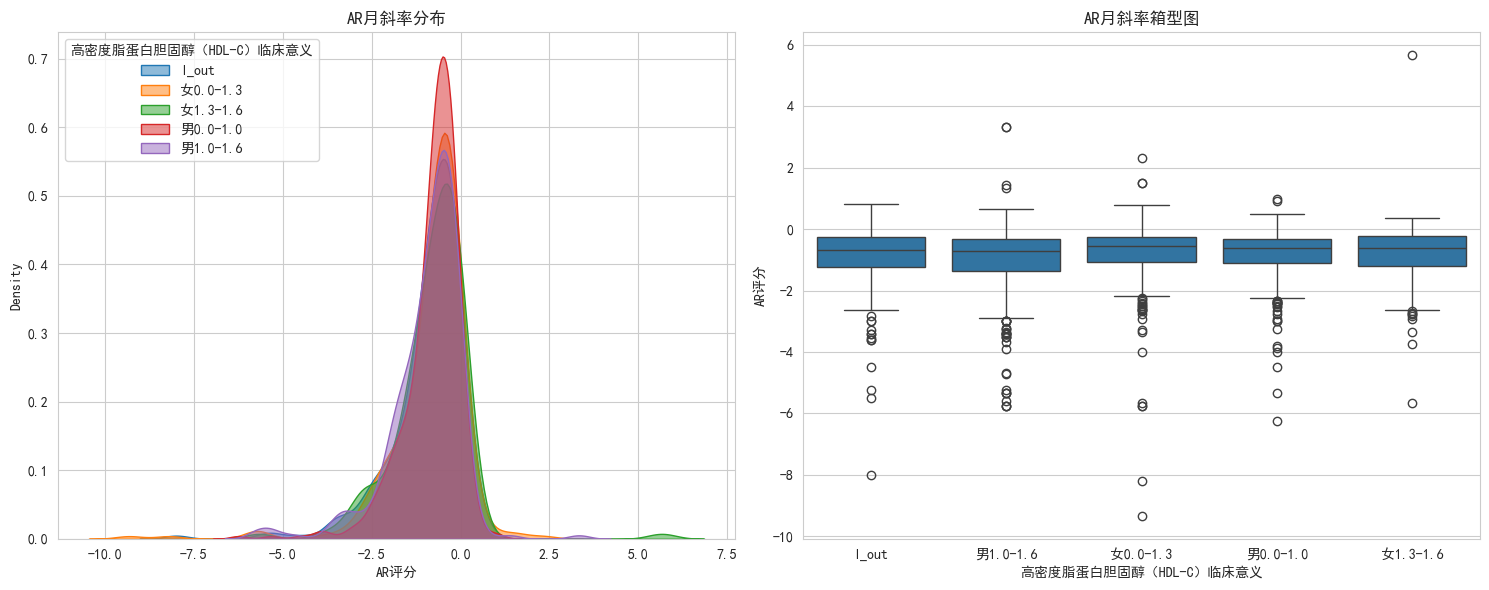

  高密度脂蛋白胆固醇（HDL-C）临床意义  患者人数
0                l_out   198
1             女0.0-1.3   228
2             女1.3-1.6   126
3             男0.0-1.0   327
4             男1.0-1.6   422
Mean values for different categories of 高密度脂蛋白胆固醇（HDL-C）临床意义 with AR_K_Mon:
高密度脂蛋白胆固醇（HDL-C）临床意义
l_out      -0.934600
女0.0-1.3   -0.864288
女1.3-1.6   -0.814679
男0.0-1.0   -0.807001
男1.0-1.6   -0.968227
Name: AR_K_Mon, dtype: float64
Shapiro-Wilk检验: 统计量=0.8353193208949423, p值=6.224699903943792e-38
数据不符合正态分布


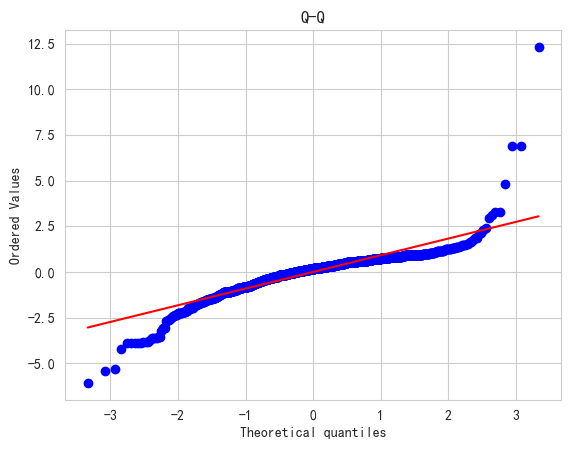

Kruskal-Wallis H 检验
统计量: 7.7413
p 值: 0.1015
检验结果不显著 (p = 0.1015)。不能拒绝零假设，说明组间均值差异不显著。
Dunn's 检验
             l_out  女0.0-1.3  女1.3-1.6  男0.0-1.0  男1.0-1.6
l_out     1.000000  0.271185  0.391567  0.442477  0.335953
女0.0-1.3  0.271185  1.000000  0.957335  0.654092  0.022049
女1.3-1.6  0.391567  0.957335  1.000000  0.765347  0.083906
男0.0-1.0  0.442477  0.654092  0.765347  1.000000  0.038539
男1.0-1.6  0.335953  0.022049  0.083906  0.038539  1.000000


,患者编号,最早时间,最早总分,最晚时间,最晚总分,Aspirin,天数差,月份差,总分差,AR_K_day,AR_K_Mon,性别,姓名,检查日期,高密度脂蛋白胆固醇（HDL-C）,高密度脂蛋白胆固醇（HDL-C）(单位),转换后的高密度脂蛋白胆固醇（HDL-C）,统一单位,高密度脂蛋白胆固醇（HDL-C）临床意义
3,202310160013,2023-10-16,41.0,2024-01-30,40.0,N,106.0,3.0,-1.0,-0.009434,-0.333333,女,何芳,2023-08-10,1.92,mmol/L,1.92,mmol/L,l_out
7,202310110014,2023-10-12,32.0,2024-05-11,15.0,N,212.0,7.0,-17.0,-0.080189,-2.428571,男,马超,2023-07-13,1.29,mmol/L,1.29,mmol/L,男1.0-1.6
12,202310090010,2023-10-10,35.0,2024-02-27,31.0,N,140.0,4.0,-4.0,-0.028571,-1.000000,男,杨拴学,2023-08-22,1.48,mmol/L,1.48,mmol/L,男1.0-1.6
13,202310090010,2023-10-10,35.0,2024-02-27,31.0,N,140.0,4.0,-4.0,-0.028571,-1.000000,男,杨拴学,2023-08-04,1.61,mmol/L,1.61,mmol/L,l_out
15,202310090001,2023-10-09,42.0,2024-02-07,38.0,N,121.0,4.0,-4.0,-0.033058,-1.000000,女,谈红霞,2023-09-29,0.89,mmol/L,0.89,mmol/L,女0.0-1.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2639,202009170004,2020-09-18,36.0,2021-10-02,22.0,N,379.0,13.0,-14.0,-0.036939,-1.076923,男,管亚彬,2020-11-04,1.01,mmol/L,1.01,mmol/L,男1.0-1.6
2640,202009170004,2020-09-18,36.0,2021-10-02,22.0,N,379.0,13.0,-14.0,-0.036939,-1.076923,男,管亚彬,2019-06-18,0.87,mmol/L,0.87,mmol/L,男0.0-1.0
2641,202009170003,2020-11-10,40.0,2022-11-20,20.0,N,740.0,24.0,-20.0,-0.027027,-0.833333,男,武杰,2018-11-30,1.00,mmol/L,1.00,mmol/L,男1.0-1.6
2642,202009170003,2020-11-10,40.0,2022-11-20,20.0,N,740.0,24.0,-20.0,-0.027027,-0.833333,男,武杰,2017-12-09,0.96,mmol/L,0.96,mmol/L,男0.0-1.0


In [38]:
# 1 mmol/L HDL-C ≈ 38.67 mg/dL HDL-C
# 1 mg/dL HDL-C ≈ 0.02586 mmol/L HDL-C
# 理想水平：
# - 男性：大于 40 mg/dL（1.0 mmol/L）
# - 女性：大于 50 mg/dL（1.3 mmol/L）
# 低水平：
# - 男性：低于 40 mg/dL（1.0 mmol/L）
# - 女性：低于 50 mg/dL（1.3 mmol/L）
# 高水平（通常被认为有保护作用，虽然具体的阈值可能因不同的指导方针而异）：
# - 男性：大于 60 mg/dL（1.6 mmol/L）
# - 女性：大于 60 mg/dL（1.6 mmol/L）

# 注意这个指标低于正常值是不好，高于正常值是好的 
# 这个指标过低的人很多
# JAMA Network Open》：
# 
# 一项研究发现，在美国成年人中，低 HDL 胆固醇的发生率大约为 16-18%。
# 《The Lancet》：
# 
# 这篇文章中提到，在全球范围内，低 HDL 胆固醇的发生率约为 10-20%。
Test_Indicators, Units = ['高密度脂蛋白胆固醇（HDL-C）', '高密度脂蛋白胆固醇（HDL-C）(单位)']
df_hdl = test_counts(Test_Indicators, Units,df_test)
df_hdl.to_csv('df_hdl.csv',encoding='utf-8-sig')
df_hdl 

高密度脂蛋白偏低的原因
不良生活方式：
长期摄入高脂食物、大量饮酒吸烟、长时间熬夜作息不规律、缺乏运动等都可能导致高密度脂蛋白偏低。
疾病因素：
肝炎疾病是导致高密度脂蛋白偏低最为常见的原因。
肾功能衰竭、糖尿病、肾病综合征等疾病也会直接导致高密度脂蛋白偏低。
其他因素：
肥胖和超重、不健康的饮食习惯（如摄入高胆固醇和高饱和脂肪的饮食）也可能降低高密度脂蛋白水平。

谷丙转氨酶（ALT）


Please input the conversion factors for each unit relative to the base unit.
The base unit is: IU/L
清洗前有(3463, 7)条记录
清洗后有(3426, 7)条记录
范围-90.96951154457403,163.86960395000287


D:\asl\venv\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


生成的区间为:
{'M': [0.0, 10.0, 40.0], 'W': [0.0, 7.0, 35.0]}
谷丙转氨酶（ALT）

Counts of each 临床意义:
谷丙转氨酶（ALT）临床意义
男10.0-40.0    1379
l_out         1035
女7.0-35.0      950
男0.0-10.0       38
女0.0-7.0        24
Name: count, dtype: int64

Proportions of each 临床意义:
谷丙转氨酶（ALT）临床意义
男10.0-40.0    0.402510
l_out         0.302102
女7.0-35.0     0.277291
男0.0-10.0     0.011092
女0.0-7.0      0.007005
Name: proportion, dtype: float64


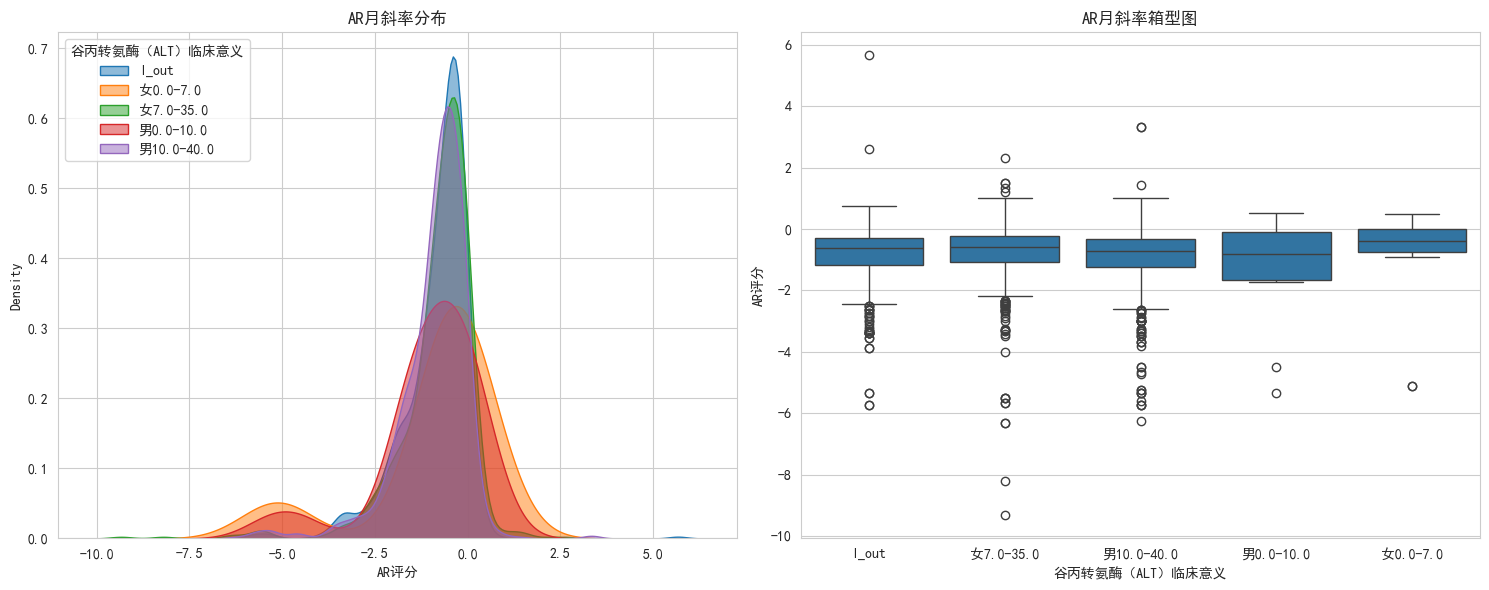

  谷丙转氨酶（ALT）临床意义  患者人数
0          l_out   415
1       女0.0-7.0    15
2      女7.0-35.0   409
3      男0.0-10.0    23
4     男10.0-40.0   568
Mean values for different categories of 谷丙转氨酶（ALT）临床意义 with AR_K_Mon:
谷丙转氨酶（ALT）临床意义
l_out        -0.854089
女0.0-7.0     -0.907098
女7.0-35.0    -0.820208
男0.0-10.0    -1.037455
男10.0-40.0   -0.918544
Name: AR_K_Mon, dtype: float64
Shapiro-Wilk检验: 统计量=0.8425776102647469, p值=7.661801240152602e-42
数据不符合正态分布


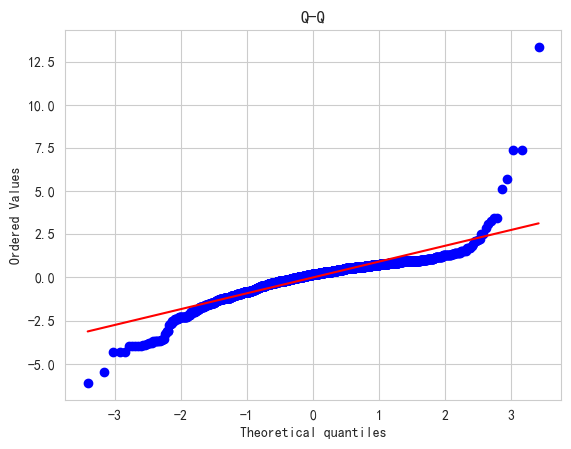

Kruskal-Wallis H 检验
统计量: 15.4233
p 值: 0.0039
检验结果显著 (p = 0.0039)。可以拒绝零假设，说明组间均值存在显著差异。
Dunn's 检验
               l_out  女0.0-7.0  女7.0-35.0  男0.0-10.0  男10.0-40.0
l_out       1.000000  0.110234   0.111028   0.921069    0.064906
女0.0-7.0    0.110234  1.000000   0.215793   0.187998    0.047194
女7.0-35.0   0.111028  0.215793   1.000000   0.592648    0.000415
男0.0-10.0   0.921069  0.187998   0.592648   1.000000    0.714263
男10.0-40.0  0.064906  0.047194   0.000415   0.714263    1.000000


,患者编号,最早时间,最早总分,最晚时间,最晚总分,Aspirin,天数差,月份差,总分差,AR_K_day,AR_K_Mon,性别,姓名,检查日期,谷丙转氨酶（ALT）,谷丙转氨酶（ALT）(单位),转换后的谷丙转氨酶（ALT）,统一单位,谷丙转氨酶（ALT）临床意义
0,202310160033,2023-12-16,39.0,2024-04-25,39.0,N,131.0,4.0,0.0,0.000000,0.000000,女,张光容,2023-06-26,42.0,IU/L,42.0,IU/L,l_out
3,202310160013,2023-10-16,41.0,2024-01-30,40.0,N,106.0,3.0,-1.0,-0.009434,-0.333333,女,何芳,2023-08-10,17.0,U/L,17.0,IU/L,女7.0-35.0
8,202310110014,2023-10-12,32.0,2024-05-11,15.0,N,212.0,7.0,-17.0,-0.080189,-2.428571,男,马超,2023-07-13,24.0,U/L,24.0,IU/L,男10.0-40.0
12,202310090010,2023-10-10,35.0,2024-02-27,31.0,N,140.0,4.0,-4.0,-0.028571,-1.000000,男,杨拴学,2023-08-22,38.0,IU/L,38.0,IU/L,男10.0-40.0
13,202310090010,2023-10-10,35.0,2024-02-27,31.0,N,140.0,4.0,-4.0,-0.028571,-1.000000,男,杨拴学,2023-08-16,33.0,IU/L,33.0,IU/L,男10.0-40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3413,202009180001,2020-10-12,19.0,2023-04-01,1.0,N,901.0,30.0,-18.0,-0.019978,-0.600000,男,卢东锋,2016-03-03,42.0,U/L,42.0,IU/L,l_out
3419,202009170003,2020-11-10,40.0,2022-11-20,20.0,N,740.0,24.0,-20.0,-0.027027,-0.833333,男,武杰,2018-11-30,84.0,U/L,84.0,IU/L,l_out
3420,202009170003,2020-11-10,40.0,2022-11-20,20.0,N,740.0,24.0,-20.0,-0.027027,-0.833333,男,武杰,2017-12-09,36.8,U/L,36.8,IU/L,男10.0-40.0
3424,202009150002,2020-10-20,39.0,2022-12-02,41.0,N,773.0,26.0,2.0,0.002587,0.076923,女,尹佳,2019-02-15,11.0,U/L,11.0,IU/L,女7.0-35.0


In [39]:
# 对于成人男性：通常为10到40单位/升。
# 对于成人女性：通常为7到35单位/升。

# 《Hepatology》 期刊中的研究可能会提供有关 ALT 异常的普遍性数据。例如，某些研究表明，在美国成年人中，大约10-20%的人群可能会出现 ALT 异常。
# 
# 2. 具体研究和调查结果
# 一些具体的研究和调查提供了 ALT 异常的详细比例数据：
# 
# 中国：
# 
# 一项研究《Prevalence of Elevated Alanine Aminotransferase Levels in a Large Chinese Population》显示，在中国成人中，ALT 升高的发生率约为 10%。
# 韩国：
# 
# 韩国的研究《Prevalence of Elevated Liver Enzymes and Its Risk Factors in Korean Adults》指出，韩国成人中大约有 15% 的人群存在 ALT 升高的问题。
# 谷丙转氨酶（ALT）的单位U/L和IU/L在本质上是相同的
# ALT 作为一个肝脏健康的标志物，其水平变化可以反映出肝脏的损伤或疾病状态。通过监测 ALT 的变化，可以帮助医生诊断和评估各种肝脏相关疾病的严重性和进展情况。如果 ALT 水平异常，进一步的检查和诊断可能是必要的。
# 例如，某些药物如Riluzole（一种用于ALS的药物）可能会引起肝功能的变化，特别是如果患者长期使用或者高剂量使用时。Riluzole可能导致肝酶（如ALT、AST）水平升高

Test_Indicators, Units = ['谷丙转氨酶（ALT）', '谷丙转氨酶（ALT）(单位)']
df_ALT = test_counts(Test_Indicators, Units,df_test)
df_ALT.to_csv('df_ALT.csv',encoding='utf-8-sig')
df_ALT

谷草转氨酶（AST）

Please input the conversion factors for each unit relative to the base unit.
The base unit is: U/L
清洗前有(3546, 7)条记录
清洗后有(3545, 7)条记录
范围-4602.965715454151,4713.326177947101


D:\asl\venv\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


生成的区间为:
{'M': [0.0, 40.0], 'W': [0.0, 40.0]}
谷草转氨酶（AST）

Counts of each 临床意义:
谷草转氨酶（AST）临床意义
男0.0-40.0    1872
女0.0-40.0    1176
l_out         497
Name: count, dtype: int64

Proportions of each 临床意义:
谷草转氨酶（AST）临床意义
男0.0-40.0    0.528068
女0.0-40.0    0.331735
l_out        0.140197
Name: proportion, dtype: float64


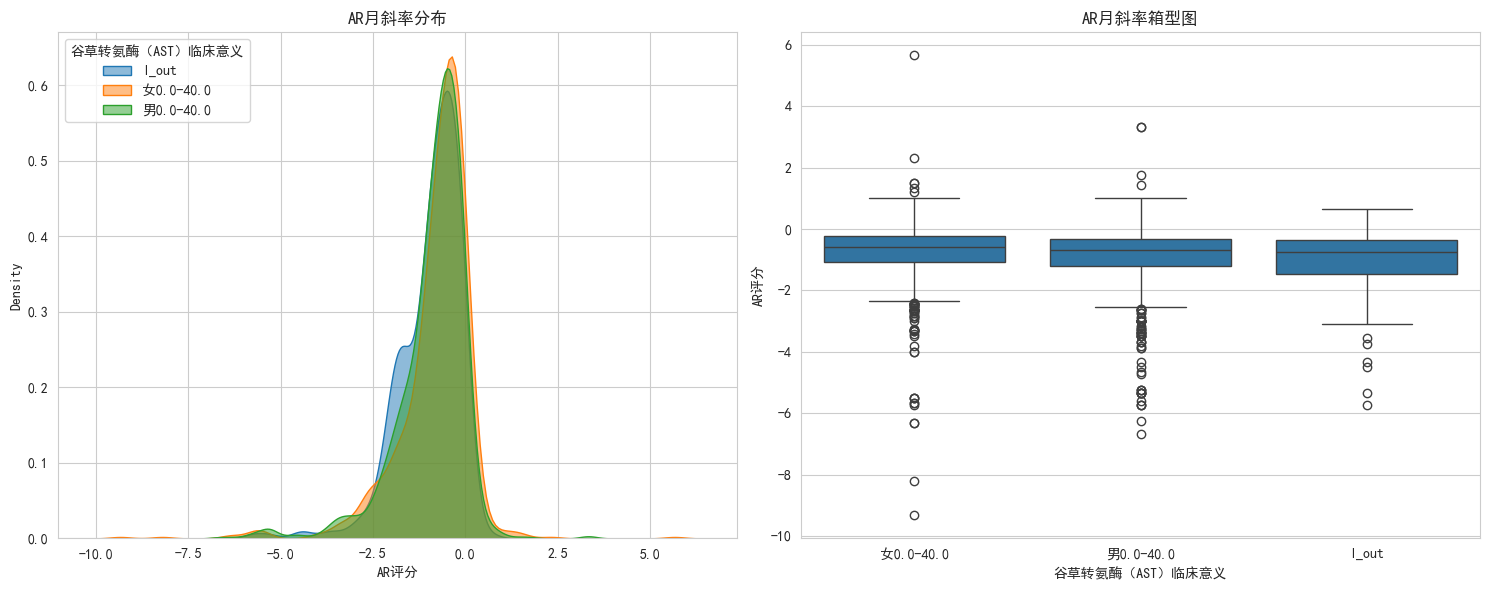

  谷草转氨酶（AST）临床意义  患者人数
0          l_out   215
1      女0.0-40.0   468
2      男0.0-40.0   731
Mean values for different categories of 谷草转氨酶（AST）临床意义 with AR_K_Mon:
谷草转氨酶（AST）临床意义
l_out       -0.961090
女0.0-40.0   -0.821203
男0.0-40.0   -0.905838
Name: AR_K_Mon, dtype: float64
Shapiro-Wilk检验: 统计量=0.8513810186080402, p值=1.1190115016603993e-41
数据不符合正态分布


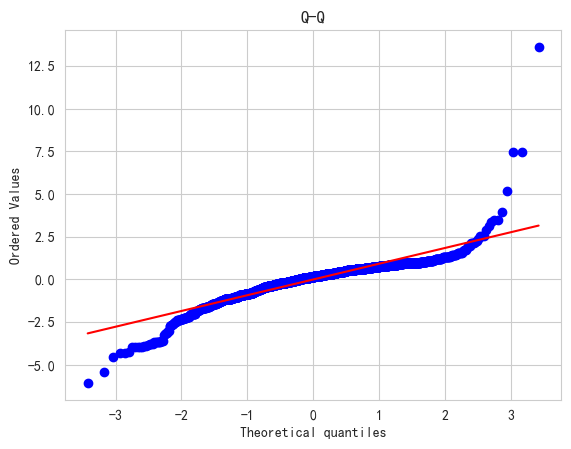

Kruskal-Wallis H 检验
统计量: 17.2700
p 值: 0.0002
检验结果显著 (p = 0.0002)。可以拒绝零假设，说明组间均值存在显著差异。
Dunn's 检验
              l_out  女0.0-40.0  男0.0-40.0
l_out      1.000000   0.000172   0.103331
女0.0-40.0  0.000172   1.000000   0.001313
男0.0-40.0  0.103331   0.001313   1.000000


,患者编号,最早时间,最早总分,最晚时间,最晚总分,Aspirin,天数差,月份差,总分差,AR_K_day,AR_K_Mon,性别,姓名,检查日期,谷草转氨酶（AST）,谷草转氨酶（AST）(单位),转换后的谷草转氨酶（AST）,统一单位,谷草转氨酶（AST）临床意义
2,202310160013,2023-10-16,41.0,2024-01-30,40.0,N,106.0,3.0,-1.0,-0.009434,-0.333333,女,何芳,2023-08-10,18.0,U/L,18.0,U/L,女0.0-40.0
7,202310110014,2023-10-12,32.0,2024-05-11,15.0,N,212.0,7.0,-17.0,-0.080189,-2.428571,男,马超,2023-07-13,21.0,U/L,21.0,U/L,男0.0-40.0
12,202310090010,2023-10-10,35.0,2024-02-27,31.0,N,140.0,4.0,-4.0,-0.028571,-1.000000,男,杨拴学,2023-08-22,19.0,IU/L,19.0,U/L,男0.0-40.0
13,202310090010,2023-10-10,35.0,2024-02-27,31.0,N,140.0,4.0,-4.0,-0.028571,-1.000000,男,杨拴学,2023-08-16,13.0,IU/L,13.0,U/L,男0.0-40.0
14,202310090010,2023-10-10,35.0,2024-02-27,31.0,N,140.0,4.0,-4.0,-0.028571,-1.000000,男,杨拴学,2023-08-04,14.0,IU/L,14.0,U/L,男0.0-40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3531,202011130001,2020-11-19,21.0,2021-07-09,0.0,N,232.0,8.0,-21.0,-0.090517,-2.625000,女,瞿婷婷,2020-05-09,520.0,U/L,520.0,U/L,l_out
3534,202009180001,2020-10-12,19.0,2023-04-01,1.0,N,901.0,30.0,-18.0,-0.019978,-0.600000,男,卢东锋,2016-03-03,36.0,U/L,36.0,U/L,男0.0-40.0
3539,202009170003,2020-11-10,40.0,2022-11-20,20.0,N,740.0,24.0,-20.0,-0.027027,-0.833333,男,武杰,2018-11-30,35.0,U/L,35.0,U/L,男0.0-40.0
3540,202009170003,2020-11-10,40.0,2022-11-20,20.0,N,740.0,24.0,-20.0,-0.027027,-0.833333,男,武杰,2017-12-09,21.7,U/L,21.7,U/L,男0.0-40.0


In [40]:
# 尽管U/L和IU/L在表示方法上有所不同，但它们在描述AST等生化指标的浓度时，实际上表达的是相同的概念
# 0-40
# 也称为谷草转氨酶，是一种在人体多种细胞中，尤其是肝细胞、心肌细胞、骨骼肌细胞等中广泛存在的酶。在正常情况下，这些细胞内的AST不会大量释放到血液中，因此血液中AST的浓度相对较然而，当这些细胞受损时，比如肝细胞受损，AST就会从细胞内释放到血液中，导致血液中AST的浓度升高。因此，AST的浓度常被用作评估肝脏损伤的一个指标。
Test_Indicators, Units = ['谷草转氨酶（AST）', '谷草转氨酶（AST）(单位)']
df_AST = test_counts(Test_Indicators, Units,df_test)
df_AST.to_csv('df_AST.csv',encoding='utf-8-sig')

df_AST


乳酸脱氢酶（LDH）


Please input the conversion factors for each unit relative to the base unit.
The base unit is: U/L
清洗前有(2527, 7)条记录
清洗后有(2504, 7)条记录
范围-11.950098710240155,399.5546970481903


D:\asl\venv\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


生成的区间为:
{'M': [0.0, 120.0, 250.0], 'W': [0.0, 110.0, 250.0]}
乳酸脱氢酶（LDH）

Counts of each 临床意义:
乳酸脱氢酶（LDH）临床意义
男120.0-250.0    1278
女110.0-250.0     811
l_out            320
男0.0-120.0        74
女0.0-110.0        21
Name: count, dtype: int64

Proportions of each 临床意义:
乳酸脱氢酶（LDH）临床意义
男120.0-250.0    0.510383
女110.0-250.0    0.323882
l_out           0.127796
男0.0-120.0      0.029553
女0.0-110.0      0.008387
Name: proportion, dtype: float64


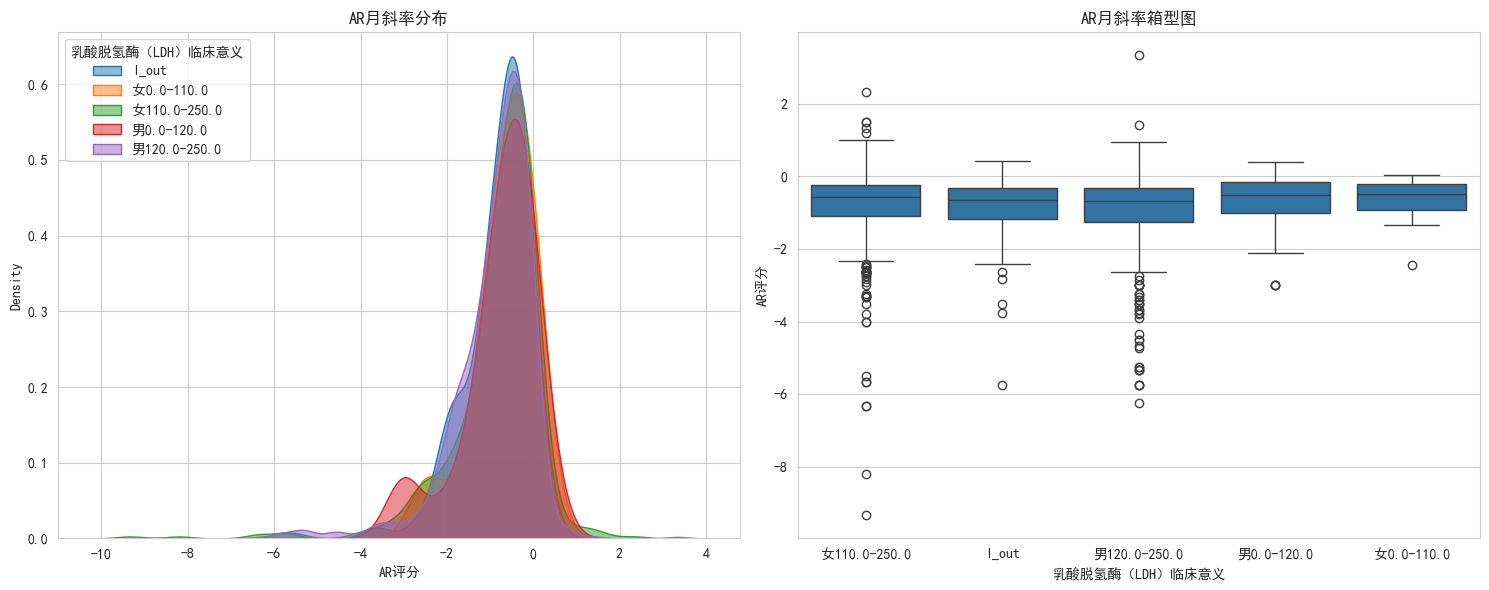

  乳酸脱氢酶（LDH）临床意义  患者人数
0          l_out   137
1     女0.0-110.0    12
2   女110.0-250.0   364
3     男0.0-120.0    35
4   男120.0-250.0   582
Mean values for different categories of 乳酸脱氢酶（LDH）临床意义 with AR_K_Mon:
乳酸脱氢酶（LDH）临床意义
l_out          -0.840868
女0.0-110.0     -0.675543
女110.0-250.0   -0.843109
男0.0-120.0     -0.768906
男120.0-250.0   -0.911055
Name: AR_K_Mon, dtype: float64
Shapiro-Wilk检验: 统计量=0.8954341956256091, p值=4.339713461921686e-31
数据不符合正态分布


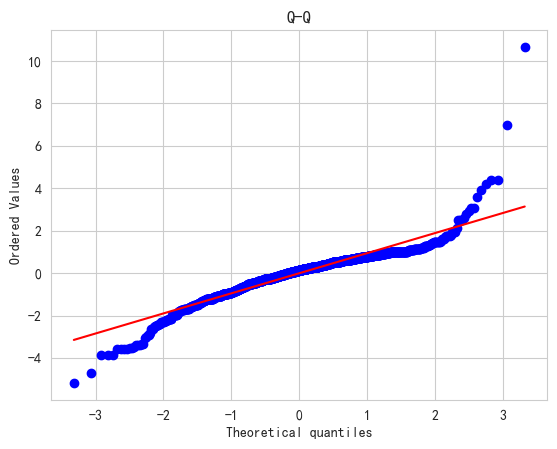

Kruskal-Wallis H 检验
统计量: 8.5192
p 值: 0.0743
检验结果不显著 (p = 0.0743)。不能拒绝零假设，说明组间均值差异不显著。
Dunn's 检验
                 l_out  女0.0-110.0  女110.0-250.0  男0.0-120.0  男120.0-250.0
l_out         1.000000    0.410163      0.225428    0.351667      0.588135
女0.0-110.0    0.410163    1.000000      0.632039    0.815775      0.318126
女110.0-250.0  0.225428    0.632039      1.000000    0.713817      0.008306
男0.0-120.0    0.351667    0.815775      0.713817    1.000000      0.205311
男120.0-250.0  0.588135    0.318126      0.008306    0.205311      1.000000


,患者编号,最早时间,最早总分,最晚时间,最晚总分,Aspirin,天数差,月份差,总分差,AR_K_day,AR_K_Mon,性别,姓名,检查日期,乳酸脱氢酶（LDH）,乳酸脱氢酶（LDH）(单位),转换后的乳酸脱氢酶（LDH）,统一单位,乳酸脱氢酶（LDH）临床意义
1,202310160013,2023-10-16,41.0,2024-01-30,40.0,N,106.0,3.0,-1.0,-0.009434,-0.333333,女,何芳,2023-08-10,161.0,U/L,161.0,U/L,女110.0-250.0
7,202310090010,2023-10-10,35.0,2024-02-27,31.0,N,140.0,4.0,-4.0,-0.028571,-1.000000,男,杨拴学,2023-08-04,273.0,IU/L,273.0,U/L,l_out
10,202310090001,2023-10-09,42.0,2024-02-07,38.0,N,121.0,4.0,-4.0,-0.033058,-1.000000,女,谈红霞,2023-09-28,185.0,U/L,185.0,U/L,女110.0-250.0
11,202310080008,2023-10-08,40.0,2024-04-11,23.0,N,186.0,6.0,-17.0,-0.091398,-2.833333,女,王建华,2023-08-16,252.0,IU/L,252.0,U/L,l_out
12,202310070013,2023-10-07,21.0,2024-03-05,11.0,N,150.0,5.0,-10.0,-0.066667,-2.000000,男,魏先存,2023-09-13,220.0,IU/L,220.0,U/L,男120.0-250.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2491,202011170003,2020-11-17,42.0,2023-09-12,22.0,N,1029.0,34.0,-20.0,-0.019436,-0.588235,男,史伟民,2020-04-21,169.0,U/L,169.0,U/L,男120.0-250.0
2493,202011140003,2020-11-14,40.0,2023-06-14,26.0,N,942.0,31.0,-14.0,-0.014862,-0.451613,男,温建平,2020-09-10,167.0,U/L,167.0,U/L,男120.0-250.0
2494,202011130001,2020-11-19,21.0,2021-07-09,0.0,N,232.0,8.0,-21.0,-0.090517,-2.625000,女,瞿婷婷,2020-05-09,273.0,IU/L,273.0,U/L,l_out
2497,202009180001,2020-10-12,19.0,2023-04-01,1.0,N,901.0,30.0,-18.0,-0.019978,-0.600000,男,卢东锋,2016-03-03,197.0,U/L,197.0,U/L,男120.0-250.0


In [42]:
# 乳酸脱氢酶的正常值范围在男性中通常为120-250U/L（或根12
# 据检测方法不同，可能略有差异，如80-280U/L），而在女性中则为110-250U/L（或100-230U/L）
Test_Indicators, Units = ['乳酸脱氢酶（LDH）', '乳酸脱氢酶（LDH）(单位)']
df_LDH = test_counts(Test_Indicators, Units,df_test)
df_LDH.to_csv('df_LDH.csv',encoding='utf-8-sig')
df_LDH

LDH的水平常常用来评估细胞损伤或炎症反应程度。当细胞受损或炎症反应发生时，细胞内的LDH会释放到血液中，导致血液中的LDH水平升高。
可以感测到LDH高，ar低

尿酸（UA）


Please input the conversion factors for each unit relative to the base unit.
The base unit is: mmol/L
清洗前有(3085, 7)条记录
清洗后有(3084, 7)条记录
范围-190.5200540566354,835.799554867008


D:\asl\venv\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


生成的区间为:
{'M': [0.0, 0.15, 0.416], 'W': [0.0, 0.089, 0.357]}
尿酸（UA）

Counts of each 临床意义:
尿酸（UA）临床意义
男0.15-0.416     1259
l_out            975
女0.089-0.357     815
男0.0-0.15         26
女0.0-0.089         9
Name: count, dtype: int64

Proportions of each 临床意义:
尿酸（UA）临床意义
男0.15-0.416     0.408236
l_out           0.316148
女0.089-0.357    0.264267
男0.0-0.15       0.008431
女0.0-0.089      0.002918
Name: proportion, dtype: float64


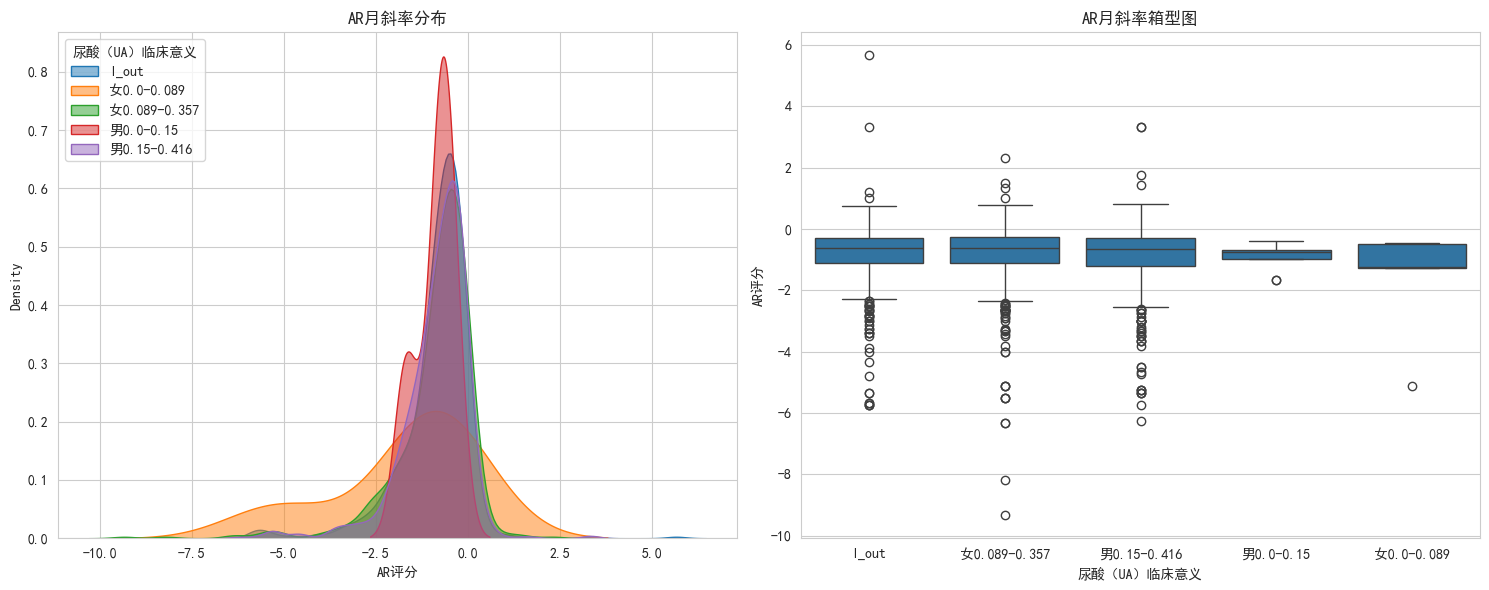

     尿酸（UA）临床意义  患者人数
0         l_out   422
1    女0.0-0.089     5
2  女0.089-0.357   364
3     男0.0-0.15     4
4   男0.15-0.416   533
Mean values for different categories of 尿酸（UA）临床意义 with AR_K_Mon:
尿酸（UA）临床意义
l_out          -0.861131
女0.0-0.089     -1.711990
女0.089-0.357   -0.898651
男0.0-0.15      -0.898313
男0.15-0.416    -0.868294
Name: AR_K_Mon, dtype: float64
Shapiro-Wilk检验: 统计量=0.83119828486607, p值=4.0223453564192376e-41
数据不符合正态分布


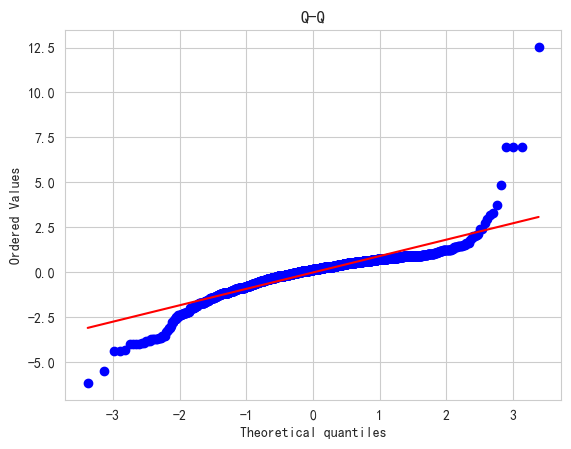

Kruskal-Wallis H 检验
统计量: 3.0407
p 值: 0.5510
检验结果不显著 (p = 0.5510)。不能拒绝零假设，说明组间均值差异不显著。
Dunn's 检验
                 l_out  女0.0-0.089  女0.089-0.357  男0.0-0.15  男0.15-0.416
l_out         1.000000    0.233537      0.449593   0.450381     0.888106
女0.0-0.089    0.233537    1.000000      0.196474   0.640345     0.239747
女0.089-0.357  0.449593    0.196474      1.000000   0.378013     0.346813
男0.0-0.15     0.450381    0.640345      0.378013   1.000000     0.462545
男0.15-0.416   0.888106    0.239747      0.346813   0.462545     1.000000


,患者编号,最早时间,最早总分,最晚时间,最晚总分,Aspirin,天数差,月份差,总分差,AR_K_day,AR_K_Mon,性别,姓名,检查日期,尿酸（UA）,尿酸（UA）(单位),转换后的尿酸（UA）,统一单位,尿酸（UA）临床意义
0,202310160033,2023-12-16,39.0,2024-04-25,39.0,N,131.0,4.0,0.0,0.000000,0.000000,女,张光容,2023-06-26,388.00,mmol/L,388.0000,mmol/L,l_out
1,202310160030,2023-11-13,30.0,2024-05-07,27.0,N,176.0,6.0,-3.0,-0.017045,-0.500000,男,刘德超,2023-06-12,492.10,umol/L,0.4921,mmol/L,l_out
3,202310160013,2023-10-16,41.0,2024-01-30,40.0,N,106.0,3.0,-1.0,-0.009434,-0.333333,女,何芳,2023-08-10,238.00,umol/L,0.2380,mmol/L,女0.089-0.357
11,202310090010,2023-10-10,35.0,2024-02-27,31.0,N,140.0,4.0,-4.0,-0.028571,-1.000000,男,杨拴学,2023-08-22,502.00,umol/L,0.5020,mmol/L,l_out
12,202310090010,2023-10-10,35.0,2024-02-27,31.0,N,140.0,4.0,-4.0,-0.028571,-1.000000,男,杨拴学,2023-08-16,480.00,umol/L,0.4800,mmol/L,l_out
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3070,202011130001,2020-11-19,21.0,2021-07-09,0.0,N,232.0,8.0,-21.0,-0.090517,-2.625000,女,瞿婷婷,2020-05-09,0.28,mmol/L,0.2800,mmol/L,女0.089-0.357
3071,202011130001,2020-11-19,21.0,2021-07-09,0.0,N,232.0,8.0,-21.0,-0.090517,-2.625000,女,瞿婷婷,NaN,272.00,umol/L,0.2720,mmol/L,女0.089-0.357
3075,202009180001,2020-10-12,19.0,2023-04-01,1.0,N,901.0,30.0,-18.0,-0.019978,-0.600000,男,卢东锋,2016-03-03,352.00,mmol/L,352.0000,mmol/L,l_out
3079,202009170003,2020-11-10,40.0,2022-11-20,20.0,N,740.0,24.0,-20.0,-0.027027,-0.833333,男,武杰,2018-11-30,566.00,umol/L,0.5660,mmol/L,l_out


In [44]:
# 男性：通常小于420μmol/L（也有资料认为应小于416μmol/L）。
# 女性：通常小于360μmol/L（也有资料认为应小于357μmol/L）
# 一般来说，酶法检测男性尿酸正常值在150～416μmol/L，女性在89～357μmol/L
# 尿酸（UA）的正常值范围如果以mmol/L为单位，通常如下：
# 1 µmol/L = 0.001 mmol/L。
# 男性：0.208 - 0.428 mmol/L
# 女性：0.155 - 0.357 mmol/L
# - 男性：0.15 mmol/L 至 0.416 mmol/L
# - 女性：0.089 mmol/L 至 0.357 mmol/L
Test_Indicators, Units = ['尿酸（UA）', '尿酸（UA）(单位)']
df_UA = test_counts(Test_Indicators, Units,df_test)
df_UA.to_csv('df_UA.csv', encoding='utf-8-sig')
df_UA 

尿酸升高可能由多种原因引起，主要包括：

嘌呤代谢障碍：部分人群由于存在基础性高血压、糖尿病、肥胖、脂肪肝等，易导致血尿酸增高

碱性磷酸酶 （ALP）


Please input the conversion factors for each unit relative to the base unit.
The base unit is: IU/L
清洗前有(2506, 7)条记录
清洗后有(2502, 7)条记录
范围-215.35513809009126,355.509423804377


D:\asl\venv\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


生成的区间为:
{'M': [0.0, 40.0, 130.0], 'W': [0.0, 40.0, 130.0]}
碱性磷酸酶 （ALP）

Counts of each 临床意义:
碱性磷酸酶 （ALP）临床意义
男40.0-130.0    1465
女40.0-130.0     865
男0.0-40.0        69
女0.0-40.0        58
l_out            45
Name: count, dtype: int64

Proportions of each 临床意义:
碱性磷酸酶 （ALP）临床意义
男40.0-130.0    0.585532
女40.0-130.0    0.345723
男0.0-40.0      0.027578
女0.0-40.0      0.023181
l_out          0.017986
Name: proportion, dtype: float64


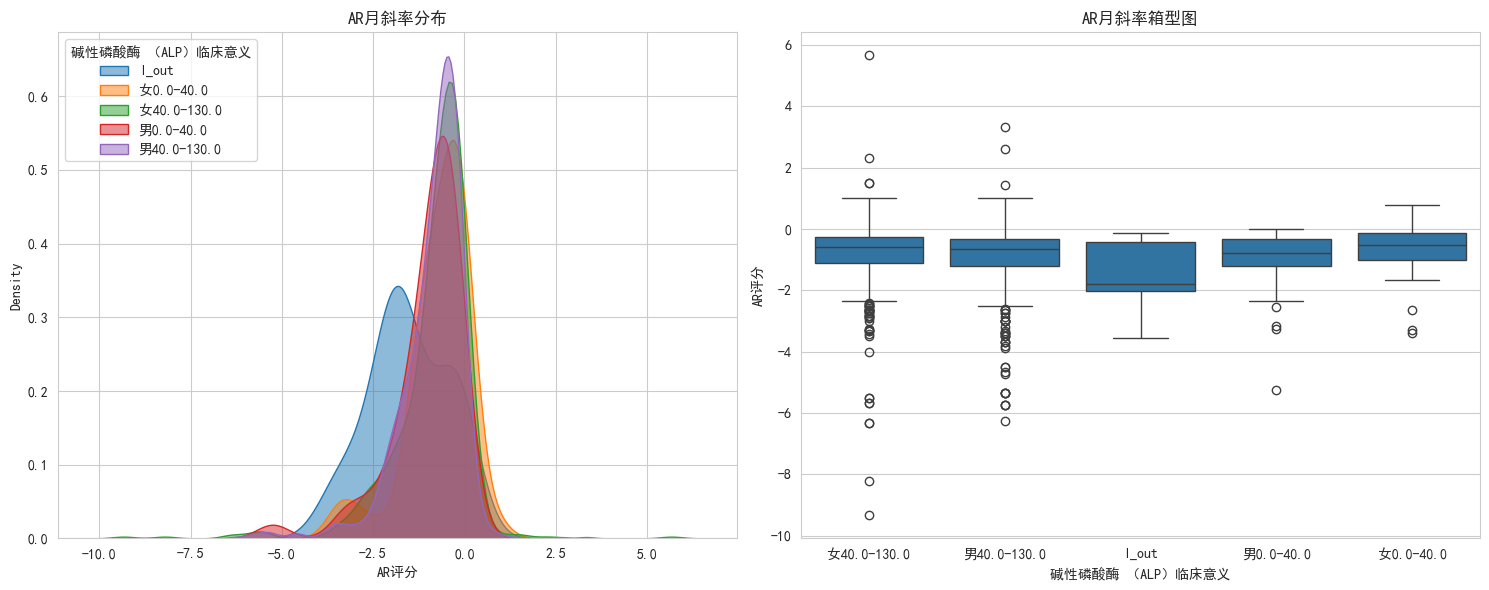

  碱性磷酸酶 （ALP）临床意义  患者人数
0           l_out    17
1       女0.0-40.0    36
2     女40.0-130.0   356
3       男0.0-40.0    36
4     男40.0-130.0   615
Mean values for different categories of 碱性磷酸酶 （ALP）临床意义 with AR_K_Mon:
碱性磷酸酶 （ALP）临床意义
l_out         -1.542004
女0.0-40.0     -0.713201
女40.0-130.0   -0.846326
男0.0-40.0     -1.026810
男40.0-130.0   -0.878462
Name: AR_K_Mon, dtype: float64
Shapiro-Wilk检验: 统计量=0.8374291492403722, p值=1.2638522232417291e-37
数据不符合正态分布


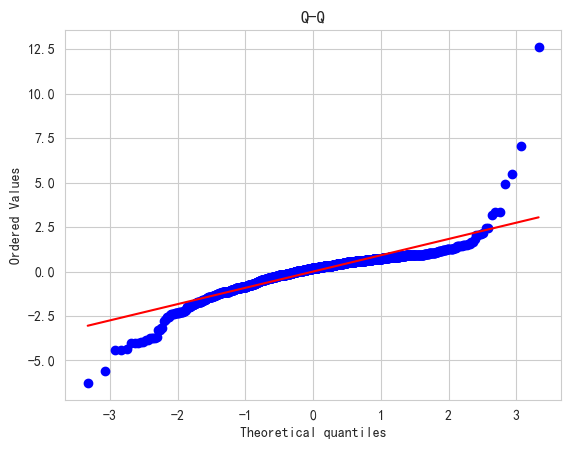

Kruskal-Wallis H 检验
统计量: 17.1890
p 值: 0.0018
检验结果显著 (p = 0.0018)。可以拒绝零假设，说明组间均值存在显著差异。
Dunn's 检验
                l_out  女0.0-40.0  女40.0-130.0  男0.0-40.0  男40.0-130.0
l_out        1.000000   0.001511     0.001882   0.104037     0.009058
女0.0-40.0    0.001511   1.000000     0.339265   0.038607     0.083718
女40.0-130.0  0.001882   0.339265     1.000000   0.058532     0.024888
男0.0-40.0    0.104037   0.038607     0.058532   1.000000     0.267409
男40.0-130.0  0.009058   0.083718     0.024888   0.267409     1.000000


,患者编号,最早时间,最早总分,最晚时间,最晚总分,Aspirin,天数差,月份差,总分差,AR_K_day,AR_K_Mon,性别,姓名,检查日期,碱性磷酸酶 （ALP）,碱性磷酸酶 （ALP）(单位),转换后的碱性磷酸酶 （ALP）,统一单位,碱性磷酸酶 （ALP）临床意义
0,202310160033,2023-12-16,39.0,2024-04-25,39.0,N,131.0,4.0,0.0,0.000000,0.000000,女,张光容,2023-06-26,49.0,IU/L,49.0,IU/L,女40.0-130.0
2,202310160013,2023-10-16,41.0,2024-01-30,40.0,N,106.0,3.0,-1.0,-0.009434,-0.333333,女,何芳,2023-08-10,50.0,U/L,50.0,IU/L,女40.0-130.0
9,202310090010,2023-10-10,35.0,2024-02-27,31.0,N,140.0,4.0,-4.0,-0.028571,-1.000000,男,杨拴学,2023-08-22,44.0,IU/L,44.0,IU/L,男40.0-130.0
10,202310090010,2023-10-10,35.0,2024-02-27,31.0,N,140.0,4.0,-4.0,-0.028571,-1.000000,男,杨拴学,2023-08-04,54.0,IU/L,54.0,IU/L,男40.0-130.0
12,202310090001,2023-10-09,42.0,2024-02-07,38.0,N,121.0,4.0,-4.0,-0.033058,-1.000000,女,谈红霞,2023-09-28,65.0,U/L,65.0,IU/L,女40.0-130.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2491,202011130001,2020-11-19,21.0,2021-07-09,0.0,N,232.0,8.0,-21.0,-0.090517,-2.625000,女,瞿婷婷,2020-05-09,157.0,U/L,157.0,IU/L,l_out
2493,202009180001,2020-10-12,19.0,2023-04-01,1.0,N,901.0,30.0,-18.0,-0.019978,-0.600000,男,卢东锋,2016-03-03,101.0,U/L,101.0,IU/L,男40.0-130.0
2496,202009170003,2020-11-10,40.0,2022-11-20,20.0,N,740.0,24.0,-20.0,-0.027027,-0.833333,男,武杰,2018-11-30,70.0,U/L,70.0,IU/L,男40.0-130.0
2497,202009170003,2020-11-10,40.0,2022-11-20,20.0,N,740.0,24.0,-20.0,-0.027027,-0.833333,男,武杰,2017-12-09,53.0,U/L,53.0,IU/L,男40.0-130.0


In [45]:
# 碱性磷酸酶（ALP）的正常值范围可能因实验室和测量方法不同而略有差异，但一般的参考范围是：
# 
# 成人：约 40 - 130 U/L
# 儿童：可能更高，因为生长中的骨骼会产生更多的ALP
Test_Indicators, Units = ['碱性磷酸酶 （ALP）', '碱性磷酸酶 （ALP）(单位)']
df_ALP = test_counts(Test_Indicators, Units,df_test)
df_ALP

# 指标的组合效应

# 对患者的这几个指标做一个聚类

In [1]:
from functools import reduce
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, MeanShift, SpectralClustering
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes
import numpy as np
from matplotlib import rcParams
import pandas as pd
from scipy.spatial.distance import cdist

合并表

In [121]:
# 整理数据
# 定义获取第16列的列名的函数
def get_16th_column_name(df):
    return df.columns[16] if len(df.columns) > 16 else None
def get_18th_column_name(df):
    return df.columns[18] if len(df.columns) > 18 else None
# 提取每个 DataFrame 的所需列
def extract_required_columns(df):
    col_16 = get_16th_column_name(df)
    col_18 = get_18th_column_name(df)
    if col_18:
        return df[['患者编号', '检查日期','性别', col_16, col_18]]
    else:
        return df[['患者编号', '检查日期']]  # 如果没有第16列，返回只有 '患者编号' 和 'AR_K_Mon' 的 DataFrame

# 对每个 DataFrame 应用列提取
l_to_clustering = [df_ALP, df_ALT, df_hdl, df_LDH, df_AST, df_ldl, df_tc, df_tg, df_UA, df_ck]
l_to_clustering = [extract_required_columns(df) for df in l_to_clustering]
# 逐个合并 DataFrame
# df_to_clustering = l_to_clustering[0]
# for df in l_to_clustering[1:]:
#     df_to_clustering = pd.merge(df_to_clustering, df, on=['患者编号', '检查日期'], how='inner')

# 使用reduce进行合并 
df_to_clustering = reduce(lambda left, right: pd.merge(left, right, on=['患者编号', '检查日期','性别'], how='inner'), l_to_clustering)
# 
#合并AR斜率
df_to_clustering = pd.merge(df_to_clustering,df_AR,on='患者编号',how='left')



In [2]:
column_all = ['碱性磷酸酶 （ALP）临床意义', '谷丙转氨酶（ALT）临床意义', '高密度脂蛋白胆固醇（HDL-C）临床意义','乳酸脱氢酶（LDH）临床意义','谷草转氨酶（AST）临床意义','低密度脂蛋白胆固醇（LDL-C）临床意义','尿酸（UA）临床意义','总胆固醇（TC）临床意义', '甘油三酯 （TG）临床意义','磷酸肌酸激酶（CK）临床意义']

In [123]:
# df_to_clustering.to_csv('df_to_clustering.csv', index=False) 

In [3]:
df_to_clustering=pd.read_csv('df_to_clustering.csv')

In [15]:
to_clustering_count = df_to_clustering['患者编号'].value_counts()
to_clustering_mean = df_to_clustering['AR_K_Mon'].mean()
df_to_clustering.dropna(subset='AR_K_Mon')
df_to_clustering['性别'].value_counts()

性别
男    472
女    284
Name: count, dtype: int64

条形图分布

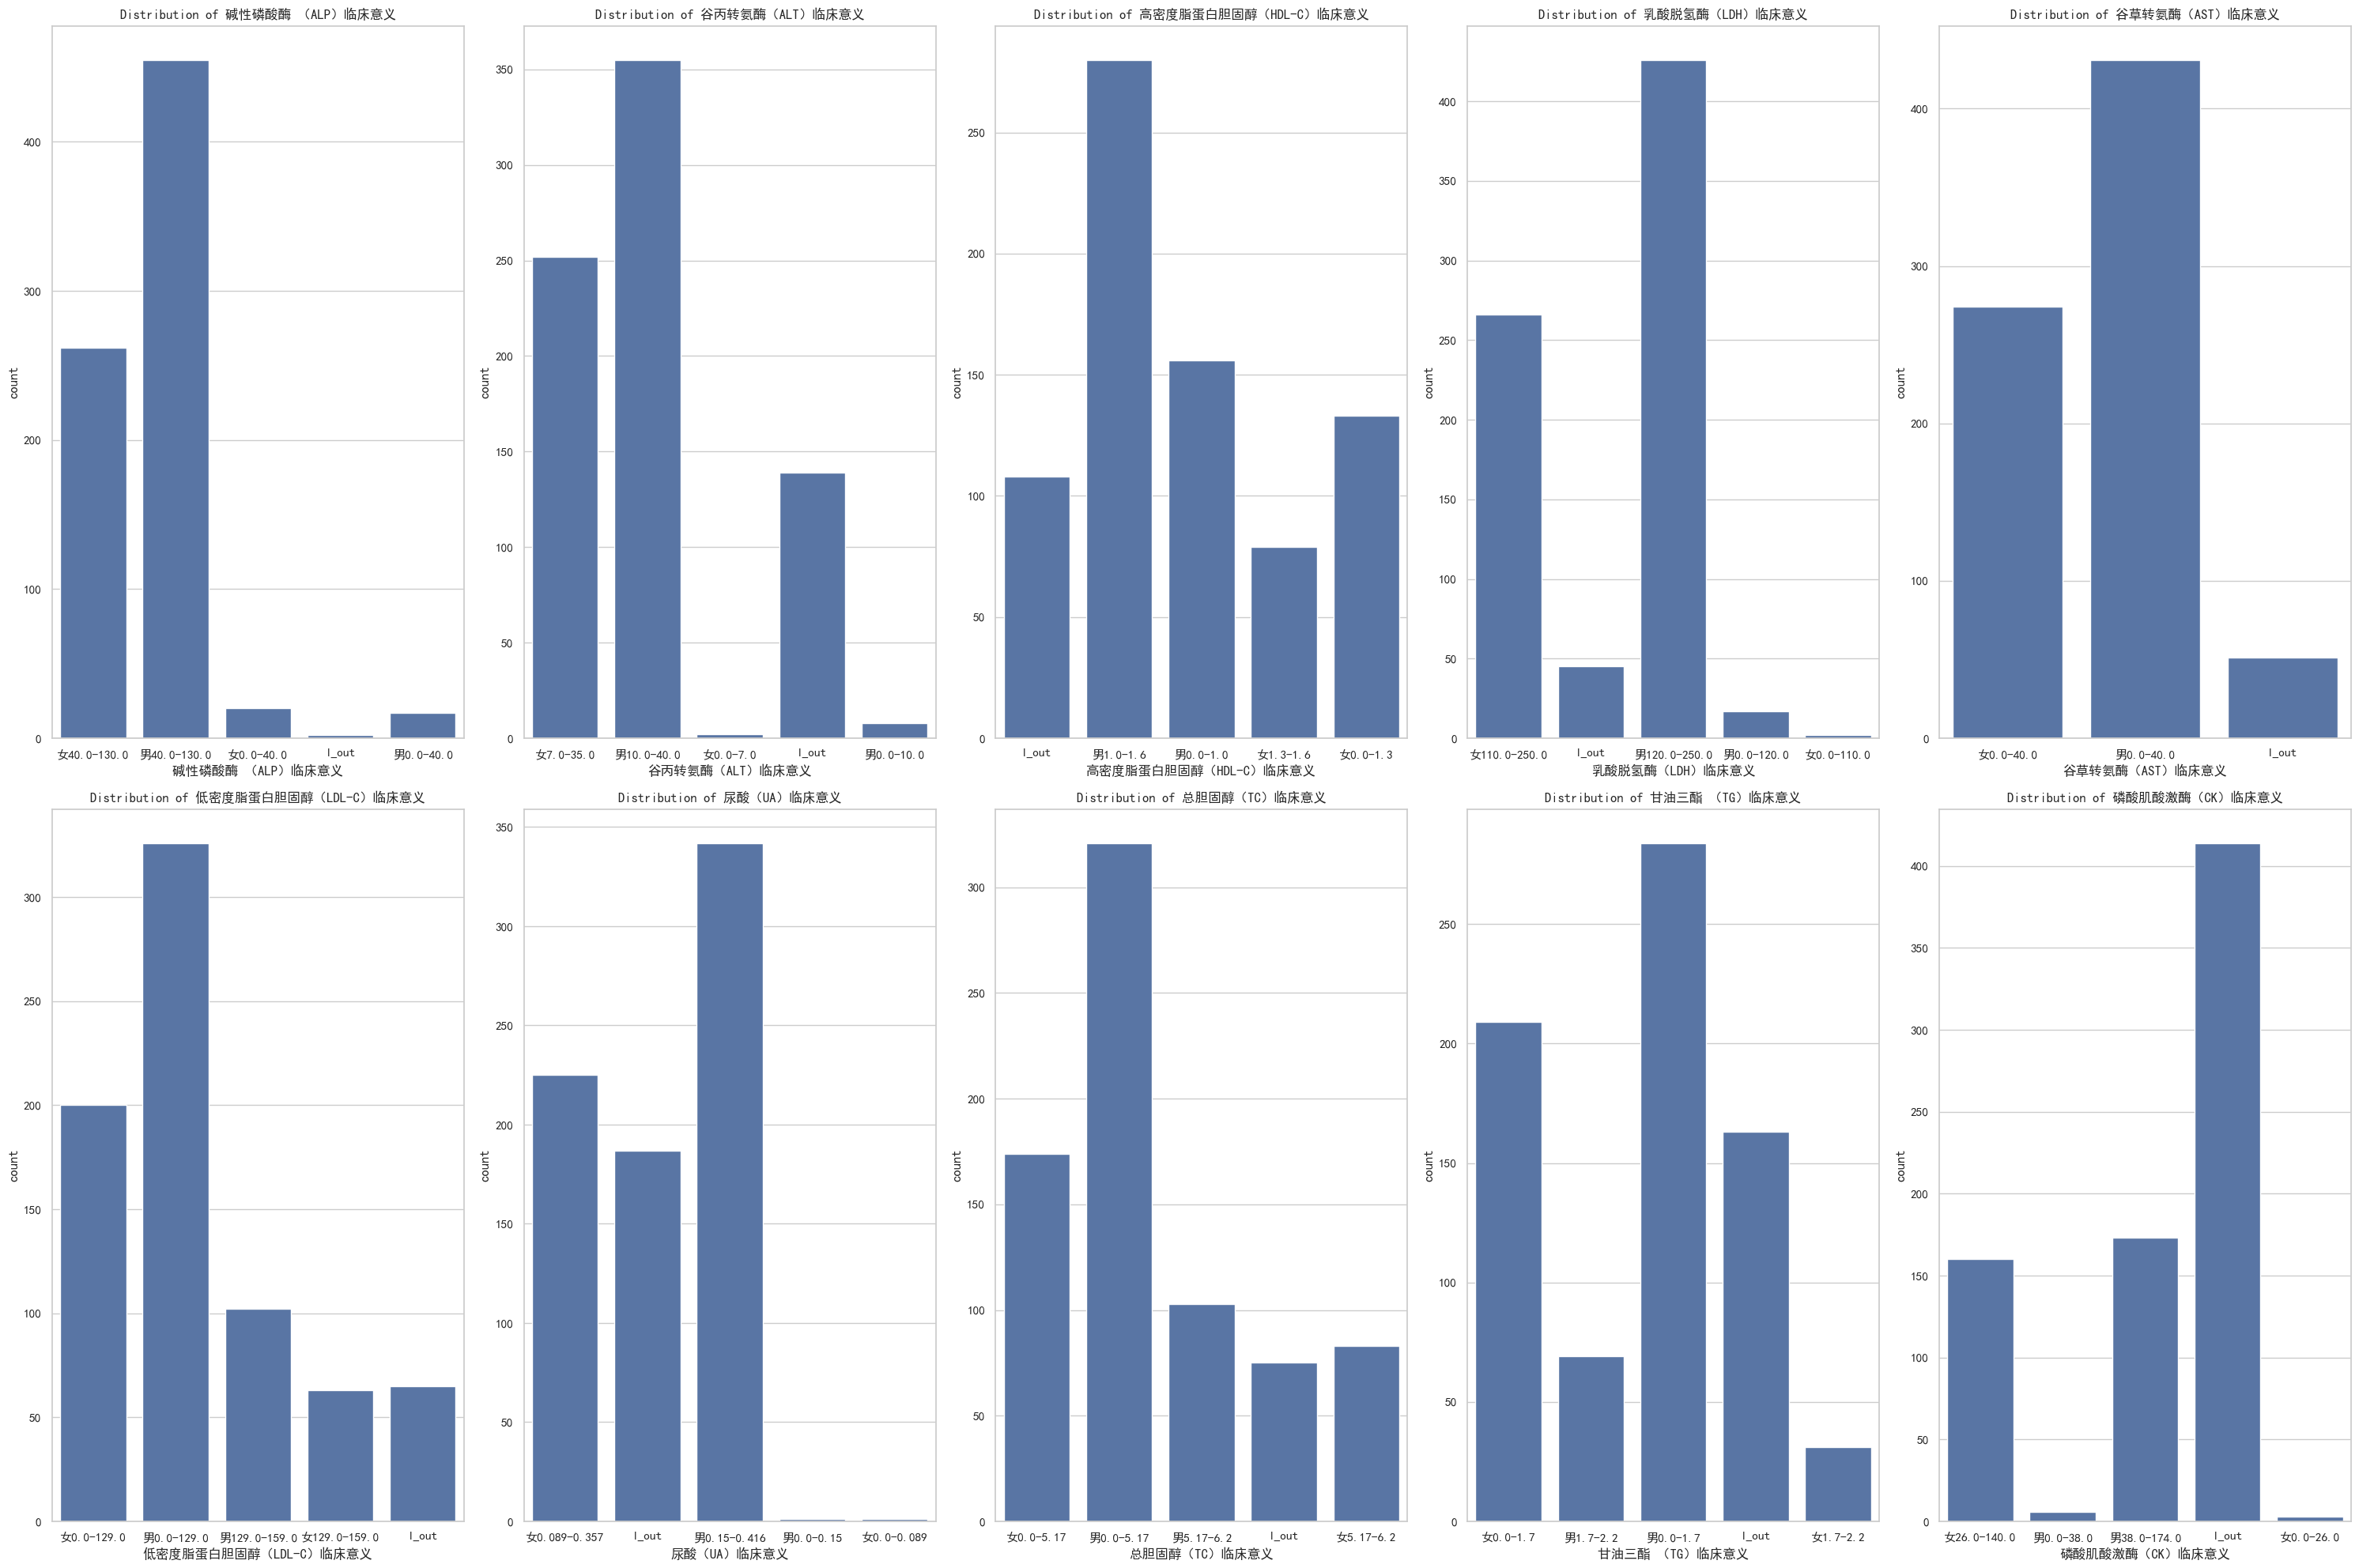

In [8]:
df = df_to_clustering[column_all].copy()


sns.set(style="whitegrid")
# 设置字体为支持中文的字体
rcParams['font.sans-serif'] = ['SimHei']  
rcParams['axes.unicode_minus'] = False  
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(30, 20))  
axes = axes.flatten()

for i, col in enumerate(df.columns):
    sns.countplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

In [16]:
# 统计单个特征的出现频率
def count_categories(df):
    category_counts = {}
    for column in df.columns:-0
        counts = df[column].value_counts()
        category_counts[column] = counts
    return category_counts

# 获取结果
category_counts = count_categories(df)
for feature, counts in category_counts.items():
    print(f"Feature: {feature}")
    print(counts)

Feature: 碱性磷酸酶 （ALP）临床意义
碱性磷酸酶 （ALP）临床意义
男40.0-130.0    455
女40.0-130.0    262
女0.0-40.0       20
男0.0-40.0       17
l_out            2
Name: count, dtype: int64
Feature: 谷丙转氨酶（ALT）临床意义
谷丙转氨酶（ALT）临床意义
男10.0-40.0    355
女7.0-35.0     252
l_out         139
男0.0-10.0       8
女0.0-7.0        2
Name: count, dtype: int64
Feature: 高密度脂蛋白胆固醇（HDL-C）临床意义
高密度脂蛋白胆固醇（HDL-C）临床意义
男1.0-1.6    280
男0.0-1.0    156
女0.0-1.3    133
l_out       108
女1.3-1.6     79
Name: count, dtype: int64
Feature: 乳酸脱氢酶（LDH）临床意义
乳酸脱氢酶（LDH）临床意义
男120.0-250.0    426
女110.0-250.0    266
l_out            45
男0.0-120.0       17
女0.0-110.0        2
Name: count, dtype: int64
Feature: 谷草转氨酶（AST）临床意义
谷草转氨酶（AST）临床意义
男0.0-40.0    431
女0.0-40.0    274
l_out         51
Name: count, dtype: int64
Feature: 低密度脂蛋白胆固醇（LDL-C）临床意义
低密度脂蛋白胆固醇（LDL-C）临床意义
男0.0-129.0      326
女0.0-129.0      200
男129.0-159.0    102
l_out            65
女129.0-159.0     63
Name: count, dtype: int64
Feature: 尿酸（UA）临床意义
尿酸（UA）临床意义
男0.15-0.416     342
女0.089-0.357    2

统计组合特征的频数

In [10]:
import string

In [11]:
def get_feature_combinations(row):
    features = row[row.notna()].tolist()
    return tuple(sorted(features))

combinations_list = df.apply(get_feature_combinations, axis=1)
combination_counts = pd.Series(combinations_list).value_counts()
combination_df = combination_counts.reset_index()
combination_df.columns = ['Combination', 'Count']
combination_df['Combination'] = combination_df['Combination'].apply(lambda x: ', '.join(x))
combination_df

,Combination,Count
0,"l_out, 男0.0-1.7, 男0.0-129.0, 男0.0-40.0, 男0.0-5...",41
1,"男0.0-1.7, 男0.0-129.0, 男0.0-40.0, 男0.0-5.17, 男0...",38
2,"女0.0-1.3, 女0.0-1.7, 女0.0-129.0, 女0.0-40.0, 女0....",24
3,"l_out, 男0.0-1.0, 男0.0-1.7, 男0.0-129.0, 男0.0-40...",21
4,"女0.0-1.7, 女0.0-129.0, 女0.0-40.0, 女0.0-5.17, 女0...",19
...,...,...
340,"l_out, l_out, l_out, 女0.0-1.7, 女0.0-129.0, 女0....",1
341,"l_out, l_out, l_out, l_out, l_out, 男0.0-1.0, 男...",1
342,"l_out, l_out, 女0.0-1.3, 女0.0-40.0, 女0.089-0.35...",1
343,"l_out, l_out, 女0.0-1.7, 女0.0-40.0, 女0.0-5.17, ...",1


C:\Users\徐文韬\AppData\Local\Temp\ipykernel_21608\191001146.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_combinations['Label'] = extended_letters[:len(top_combinations)]
C:\Users\徐文韬\AppData\Local\Temp\ipykernel_21608\191001146.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Label', data=top_combinations, palette='viridis')


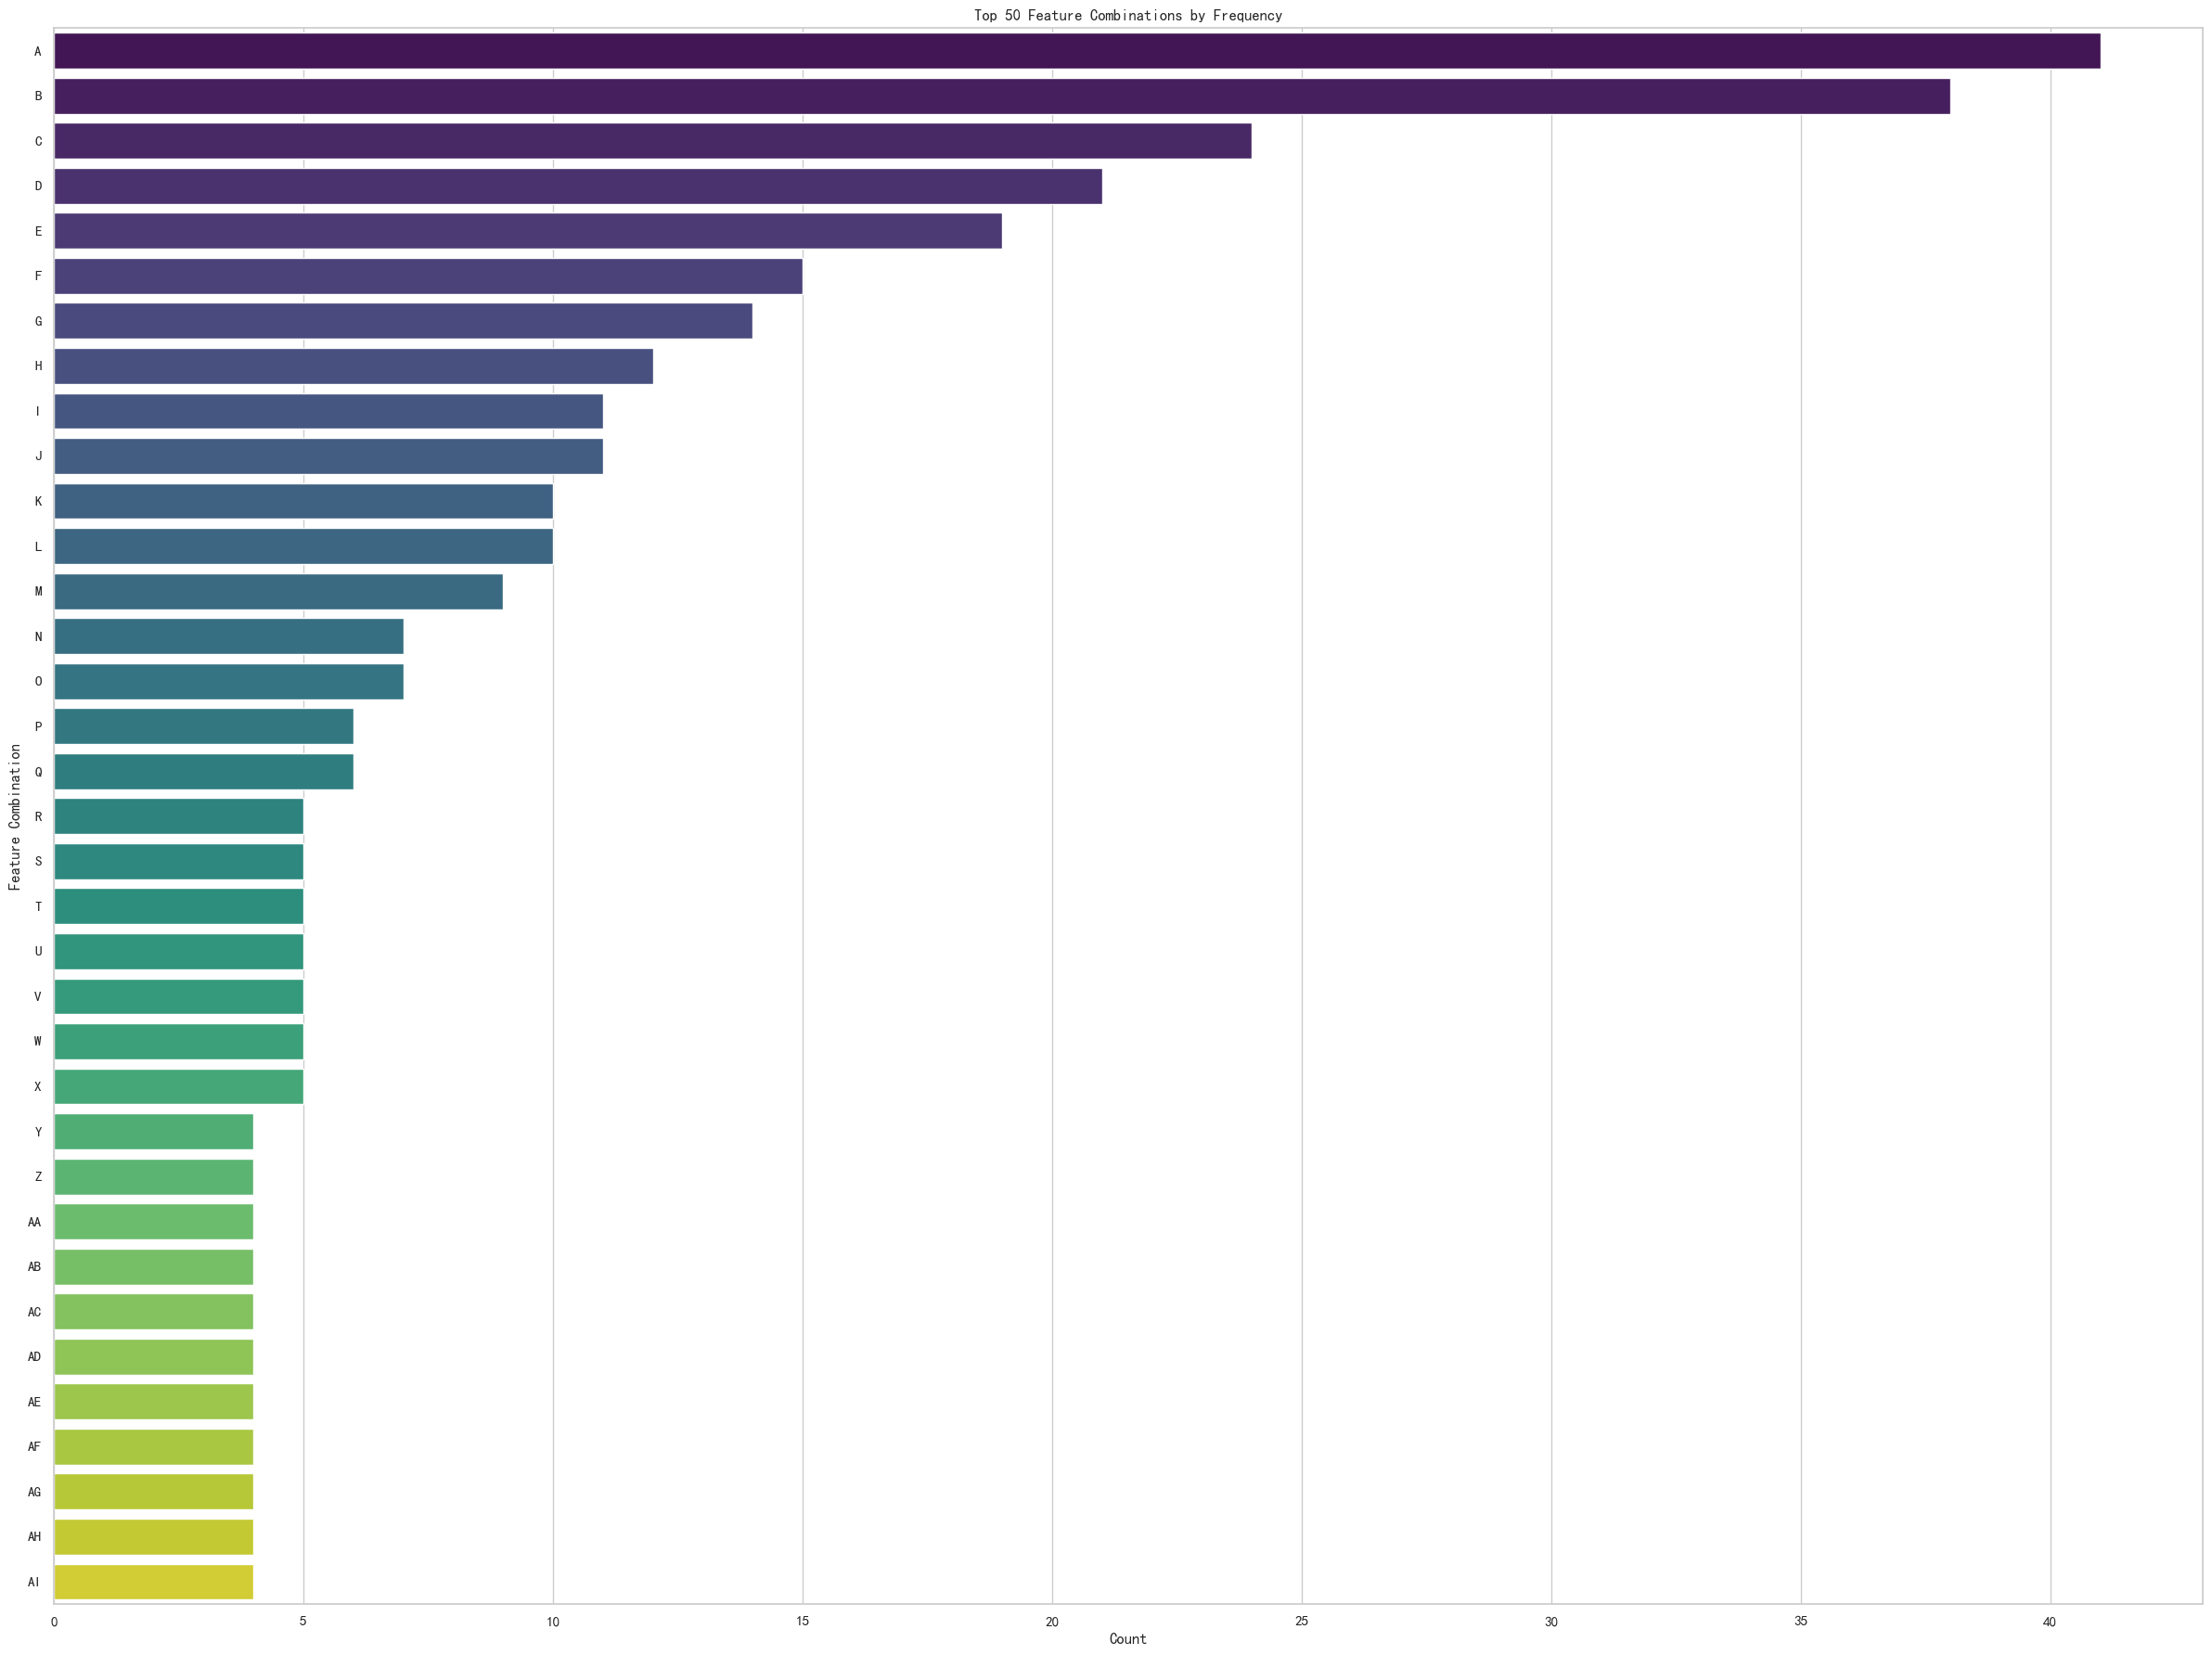

In [14]:

# 筛选前50个特征组合
top_combinations = combination_df.head(35)

# 创建字母标签映射
letters = list(string.ascii_uppercase)  # 'A', 'B', 'C', ..., 'Z'
# 如果有超过26个特征组合，可以用组合的方式
extended_letters = letters + [f'{l1}{l2}' for l1 in letters for l2 in letters][:35 - len(letters)]
top_combinations['Label'] = extended_letters[:len(top_combinations)]

# 绘制条形图
plt.figure(figsize=(24, 18))  # 增加高度以适应更多条目
sns.barplot(x='Count', y='Label', data=top_combinations, palette='viridis')

# 设置 y 轴标签为特征组合的字母标签
plt.xlabel('Count')
plt.ylabel('Feature Combination')
plt.title('Top 50 Feature Combinations by Frequency')

# 确保布局不重叠
plt.tight_layout()

# 显示图表
plt.show()

指标    ALP ALT HDL-C LDH AST LDL-C UA TC TG CK
异常比例

In [112]:
for i in column_all:
    a = df[i].value_counts(normalize=True)
    print(i)
    print(a)

碱性磷酸酶 （ALP）临床意义
碱性磷酸酶 （ALP）临床意义
男40.0-130.0    0.601852
女40.0-130.0    0.346561
女0.0-40.0      0.026455
男0.0-40.0      0.022487
l_out          0.002646
Name: proportion, dtype: float64
谷丙转氨酶（ALT）临床意义
谷丙转氨酶（ALT）临床意义
男10.0-40.0    0.469577
女7.0-35.0     0.333333
l_out         0.183862
男0.0-10.0     0.010582
女0.0-7.0      0.002646
Name: proportion, dtype: float64
高密度脂蛋白胆固醇（HDL-C）临床意义
高密度脂蛋白胆固醇（HDL-C）临床意义
男1.0-1.6    0.370370
男0.0-1.0    0.206349
女0.0-1.3    0.175926
l_out       0.142857
女1.3-1.6    0.104497
Name: proportion, dtype: float64
乳酸脱氢酶（LDH）临床意义
乳酸脱氢酶（LDH）临床意义
男120.0-250.0    0.563492
女110.0-250.0    0.351852
l_out           0.059524
男0.0-120.0      0.022487
女0.0-110.0      0.002646
Name: proportion, dtype: float64
谷草转氨酶（AST）临床意义
谷草转氨酶（AST）临床意义
男0.0-40.0    0.570106
女0.0-40.0    0.362434
l_out        0.067460
Name: proportion, dtype: float64
低密度脂蛋白胆固醇（LDL-C）临床意义
低密度脂蛋白胆固醇（LDL-C）临床意义
男0.0-129.0      0.431217
女0.0-129.0      0.264550
男129.0-159.0    0.134921
l_out           0.08597

AR

In [137]:
df_to_clustering['AR_K_Mon'].mean()

np.float64(-0.8609936811659361)

In [132]:
df_to_clustering[['性别','AR_K_Mon']]

,性别,AR_K_Mon
0,女,-0.333333
1,男,-1.000000
2,男,-4.714286
3,男,-1.333333
4,男,-0.500000
...,...,...
751,女,0.066667
752,男,-0.463415
753,男,-0.588235
754,男,-0.588235


In [113]:
def clustering_continuous(df, features, c=1,v=2):
    '''
    聚类
    :param df: 数据集
    :param features: 特征选择 
    :param c: 方法，默认为k_means
    :return: 
    '''
            
    # 提取特征数据
    X = df[features]
    
    # 标准化数据
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    match c:
        case 1:
            # k_means
            # 选择聚类数量
            n_clusters = int(input("输入kmeans_n_cluster:")) # 可以根据实际情况调整
            
            # 初始化 KMeans
            kmeans = KMeans(n_clusters=n_clusters, random_state=42)
            
            # 进行聚类
            df_to_clustering['Cluster'] = kmeans.fit_predict(X_scaled)
            
            
        case 2:
            # 选择聚类数量
            n_clusters = int(input("输入AgglomerativeClustering_cluster:"))
            # 初始化层次聚类
            agglomerative = AgglomerativeClustering(n_clusters=n_clusters)
            
            # 进行聚类
            df_to_clustering['Cluster'] = agglomerative.fit_predict(X_scaled)
        case 3:
            # 从用户输入获取 DBSCAN 参数
            eps = float(input("请输入 DBSCAN 的 eps 参数（例如 0.5）: "))
            min_samples = int(input("请输入 DBSCAN 的 min_samples 参数（例如 5）: "))
            # 初始化 DBSCAN
            dbscan = DBSCAN(eps=0.5, min_samples=5)
            
            # 进行聚类
            df_to_clustering['Cluster'] = dbscan.fit_predict(X_scaled)
            
        case 4:
            # Mean Shift
            mean_shift = MeanShift()
            df_to_clustering['Cluster'] = mean_shift.fit_predict(X_scaled)
            
        case 5:
            # Gaussian Mixture Model (GMM)
            n_components = int(input("请输入 GMM 的 n_components: "))
            gmm = GaussianMixture(n_components=n_components, random_state=42)
            df_to_clustering['Cluster'] = gmm.fit_predict(X_scaled)
            
        case 6:
            # Spectral Clustering
            n_clusters = int(input("输入SpectralClustering_n_clusters: "))
            spectral = SpectralClustering(n_clusters=n_clusters, random_state=42)
            df_to_clustering['Cluster'] = spectral.fit_predict(X_scaled)
            
        
        
            
        # case _:
        #     return "Other"
    
    # 统计每个聚类的样本数量
    cluster_counts = df_to_clustering['Cluster'].value_counts()
    print(cluster_counts)
    
    # 计算内部评价指标
    if len(set(df['Cluster'])) > 1:  # 确保有超过一个簇
        silhouette_avg = silhouette_score(X_scaled, df['Cluster'])
        ch_score = calinski_harabasz_score(X_scaled, df['Cluster'])
        db_score = davies_bouldin_score(X_scaled, df['Cluster'])
        
        print(f"Silhouette Score: {silhouette_avg:.4f}")
        print(f"Calinski-Harabasz Score: {ch_score:.4f}")
        print(f"Davies-Bouldin Score: {db_score:.4f}")
    else:
        print("只有一个簇，无法计算内部评价指标。")
    
    
    if v==2:
        # 可视化
        # 使用 PCA 将数据降到二维
        pca = PCA(n_components=2)
        X_pca = pca.fit_transform(X_scaled)
    
        # 绘制散点图
        plt.figure(figsize=(10, 7))
        plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df_to_clustering['Cluster'], cmap='viridis')
        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')
        plt.title('PCA of Clustering Results')
        plt.colorbar(label='Cluster')
        plt.show()
    
    if v==3:
        # 使用 PCA 将数据降到三维
        pca = PCA(n_components=3)
        X_pca = pca.fit_transform(X_scaled)
        
        # 绘制三维散点图
        fig = plt.figure(figsize=(10, 7))
        ax = fig.add_subplot(111, projection='3d')
        sc = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=df_to_clustering['Cluster'], cmap='viridis', s=50)
        ax.set_xlabel('Principal Component 1')
        ax.set_ylabel('Principal Component 2')
        ax.set_zlabel('Principal Component 3')
        ax.set_title('PCA of Clustering Results (3D)')
        plt.colorbar(sc, label='Cluster')
        plt.show()



In [138]:

def clustering_categorical(df, features, c=1, v=2):
    '''
    对类别数据进行聚类
    :param df: 数据集
    :param features: 特征选择
    :param c: 聚类方法选择，默认为1（K-Modes）
    :param v: 可视化选项，默认为2（2D PCA），设置为3进行3D PCA
    :return: 带有聚类结果的DataFrame
    '''
    # 提取类别特征数据
    X = df[features]
    
    # 对类别特征进行独热编码
    encoder = OneHotEncoder(sparse_output=False, drop='first')
    X_encoded = encoder.fit_transform(X)
    
    # 标准化数据
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_encoded)
    
    # 根据选择的聚类方法进行聚类
    match c:
        case 1:
            # K-Modes
            n_clusters = int(input("请输入K-Modes的聚类数量: "))
            kmodes = KModes(n_clusters=n_clusters, init='Huang', n_init=5, random_state=42)
            df['Cluster'] = kmodes.fit_predict(X)
            
        case 2:
            # K-Prototypes
            n_clusters = int(input("请输入K-Prototypes的聚类数量: "))
            kproto = KPrototypes(n_clusters=n_clusters, init='Cao', n_init=5, random_state=42)
            df['Cluster'] = kproto.fit_predict(X, categorical=[i for i in range(X.shape[1])])
            
        case 3:
            # 层次聚类（使用Hamming距离）
            n_clusters = int(input("请输入层次聚类的聚类数量: "))
            # 计算Hamming距离
            distance_matrix = cdist(X_encoded, X_encoded, metric='hamming')
            agglomerative = AgglomerativeClustering(n_clusters=n_clusters, linkage='average', affinity='precomputed')
            df['Cluster'] = agglomerative.fit_predict(distance_matrix)
        case 4:
            # DBSCAN（使用Hamming距离）
            eps = float(input("请输入DBSCAN的eps参数（例如0.5）: "))
            min_samples = int(input("请输入DBSCAN的min_samples参数（例如5）: "))
            # 计算Hamming距离
            distance_matrix = cdist(X_encoded, X_encoded, metric='hamming')
            dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric='precomputed')
            df['Cluster'] = dbscan.fit_predict(distance_matrix)
            
        case 5:
            # 谱聚类
            n_clusters = int(input("请输入谱聚类的聚类数量: "))
            # 计算Hamming距离的相似度矩阵
            distance_matrix = cdist(X_encoded, X_encoded, metric='hamming')
            spectral = SpectralClustering(n_clusters=n_clusters, affinity='precomputed', random_state=42)
            df['Cluster'] = spectral.fit_predict(distance_matrix)
    
    
    # 统计每个聚类的样本数量
    cluster_counts = df_to_clustering['Cluster'].value_counts()
    print(cluster_counts)
    
    2
    # 按 'Cluster' 分组，并对每个组去掉重复的 'PatientID'
    unique_patients_per_cluster = (
        df_to_clustering
        .groupby('Cluster')
        .apply(lambda group: group.drop_duplicates(subset='患者编号'))
        .reset_index(drop=True)
    )
    
    # 统计每个聚类中唯一患者的数量
    cluster_counts = unique_patients_per_cluster['Cluster'].value_counts()
    
    print(cluster_counts)
    
    # 计算簇内一致性
    cohesion = calculate_cohesion(X_encoded, df['Cluster'])
    print(f"Cohesion Score: {cohesion:.4f}")
    
    # 计算簇间分离度
    separation = calculate_separation(X_encoded, df['Cluster'])
    print(f"Separation Score: {separation:.4f}")
    
    
    # 可视化
    if v == 2:
        # PCA降维到二维
        pca = PCA(n_components=2)
        X_pca = pca.fit_transform(X_encoded)
        
        plt.figure(figsize=(10, 7))
        plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster'], cmap='viridis')
        plt.xlabel('主成分 1')
        plt.ylabel('主成分 2')
        plt.title('聚类结果的PCA降维（2D）')
        plt.colorbar(label='Cluster')
        plt.show()
        
    elif v == 3:
        # PCA降维到三维
        pca = PCA(n_components=3)
        X_pca = pca.fit_transform(X_encoded)
        
        fig = plt.figure(figsize=(12, 10))
        ax = fig.add_subplot(111, projection='3d')
        sc = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=df['Cluster'], cmap='viridis', s=50)
        ax.set_xlabel('主成分 1')
        ax.set_ylabel('主成分 2')
        ax.set_zlabel('主成分 3')
        ax.set_title('聚类结果的PCA降维（3D）')
        plt.colorbar(sc, label='Cluster')
        plt.show()
    
    return df
    
    
    

In [139]:
from scipy.spatial.distance import cdist
# 类别数据分类

def calculate_cohesion(X, labels):
    unique_labels = np.unique(labels)
    cohesion = 0.0
    for label in unique_labels:
        cluster_points = X[labels == label]
        if len(cluster_points) > 1:
            distances = cdist(cluster_points, cluster_points, metric='hamming')
            cohesion += np.mean(distances)
    return cohesion / len(unique_labels)

def calculate_separation(X, labels):
    unique_labels = np.unique(labels)
    separation = 0.0
    num_clusters = len(unique_labels)
    cluster_centers = [np.mean(X[labels == label], axis=0) for label in unique_labels]
    
    for i in range(num_clusters):
        for j in range(i + 1, num_clusters):
            separation += np.linalg.norm(cluster_centers[i] - cluster_centers[j])
    
    return separation / (num_clusters * (num_clusters - 1) / 2)



Cluster
1    296
2    281
0    179
Name: count, dtype: int64
Cluster
1    241
2    224
0    163
Name: count, dtype: int64
Cohesion Score: 0.1105
Separation Score: 1.9464


C:\Users\徐文韬\AppData\Local\Temp\ipykernel_23956\2291843924.py:69: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda group: group.drop_duplicates(subset='患者编号'))


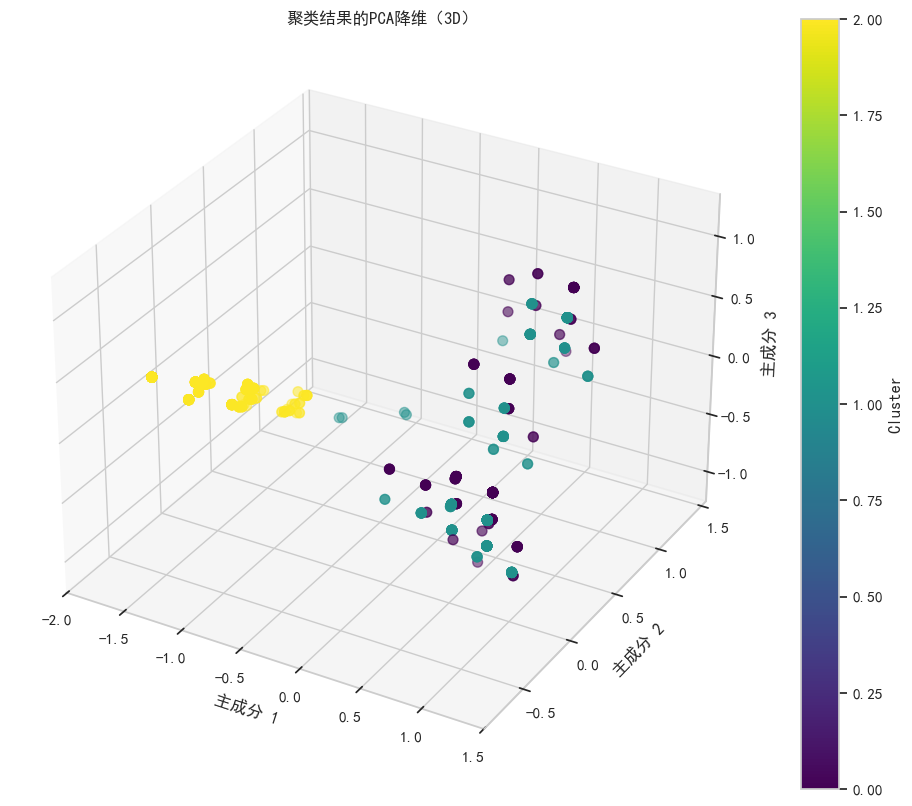

,患者编号,检查日期,性别,转换后的碱性磷酸酶 （ALP）,碱性磷酸酶 （ALP）临床意义,转换后的谷丙转氨酶（ALT）,谷丙转氨酶（ALT）临床意义,转换后的高密度脂蛋白胆固醇（HDL-C）,高密度脂蛋白胆固醇（HDL-C）临床意义,转换后的乳酸脱氢酶（LDH）,...,最早总分,最晚时间,最晚总分,Aspirin,天数差,月份差,总分差,AR_K_day,AR_K_Mon,Cluster
0,202310160013,2023-08-10,女,50.00,女40.0-130.0,17.00,女7.0-35.0,1.92,l_out,161.00,...,41.0,2024-01-30,40.0,N,106,3,-1.0,-0.009434,-0.333333,2
1,202310090010,2023-08-04,男,54.00,男40.0-130.0,32.00,男10.0-40.0,1.61,l_out,273.00,...,35.0,2024-02-27,31.0,N,140,4,-4.0,-0.028571,-1.000000,0
2,202309260001,2023-02-02,男,59.00,男40.0-130.0,27.00,男10.0-40.0,1.44,男1.0-1.6,175.00,...,38.0,2024-04-23,5.0,N,210,7,-33.0,-0.157143,-4.714286,0
3,202309120003,2023-05-09,男,53.00,男40.0-130.0,17.00,男10.0-40.0,0.88,男0.0-1.0,216.00,...,46.0,2023-12-12,42.0,N,90,3,-4.0,-0.044444,-1.333333,0
4,202309110012,2023-09-15,男,89.17,男40.0-130.0,16.02,男10.0-40.0,1.11,男1.0-1.6,160.54,...,26.0,2024-03-11,23.0,N,181,6,-3.0,-0.016575,-0.500000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,202011180001,2018-01-08,女,78.00,女40.0-130.0,19.00,女7.0-35.0,1.70,l_out,159.00,...,16.0,2023-05-15,18.0,N,907,30,2.0,0.002205,0.066667,2
752,202011170005,2019-02-19,男,53.00,男40.0-130.0,29.00,男10.0-40.0,1.33,男1.0-1.6,174.00,...,24.0,2024-04-10,5.0,N,1239,41,-19.0,-0.015335,-0.463415,1
753,202011170003,2021-02-06,男,60.00,男40.0-130.0,30.00,男10.0-40.0,1.21,男1.0-1.6,179.00,...,42.0,2023-09-12,22.0,N,1029,34,-20.0,-0.019436,-0.588235,1
754,202011170003,2020-04-21,男,43.00,男40.0-130.0,9.00,男0.0-10.0,1.17,男1.0-1.6,169.00,...,42.0,2023-09-12,22.0,N,1029,34,-20.0,-0.019436,-0.588235,1


In [148]:
# 选择用于聚类的特征列
features1 = ['转换后的碱性磷酸酶 （ALP）', '转换后的谷丙转氨酶（ALT）', 
            '转换后的总胆固醇（TC）', '转换后的甘油三酯 （TG）','转换后的磷酸肌酸激酶（CK）']
features2 = ['碱性磷酸酶 （ALP）临床意义', '谷丙转氨酶（ALT）临床意义', 
            '总胆固醇（TC）临床意义', '甘油三酯 （TG）临床意义','磷酸肌酸激酶（CK）临床意义']
# clustering_continuous(df_to_clustering,features1,c=5,v=3)
clustering_categorical(df_to_clustering,features2,c=1,v=3)

In [149]:
# 计算每个簇中 'AR_K_Mon' 的均值
cluster_ar_mean = df_to_clustering.groupby('Cluster')['AR_K_Mon'].mean()

print("每个簇的 'AR_K_Mon' 均值：")
print(cluster_ar_mean)

每个簇的 'AR_K_Mon' 均值：
Cluster
0   -0.865502
1   -0.916611
2   -0.799536
Name: AR_K_Mon, dtype: float64


In [151]:
normality_test(df_to_clustering['AR_K_Mon'])

Shapiro-Wilk检验: 统计量=0.7814748070756921, p值=1.4038655013854636e-30
数据不符合正态分布


0

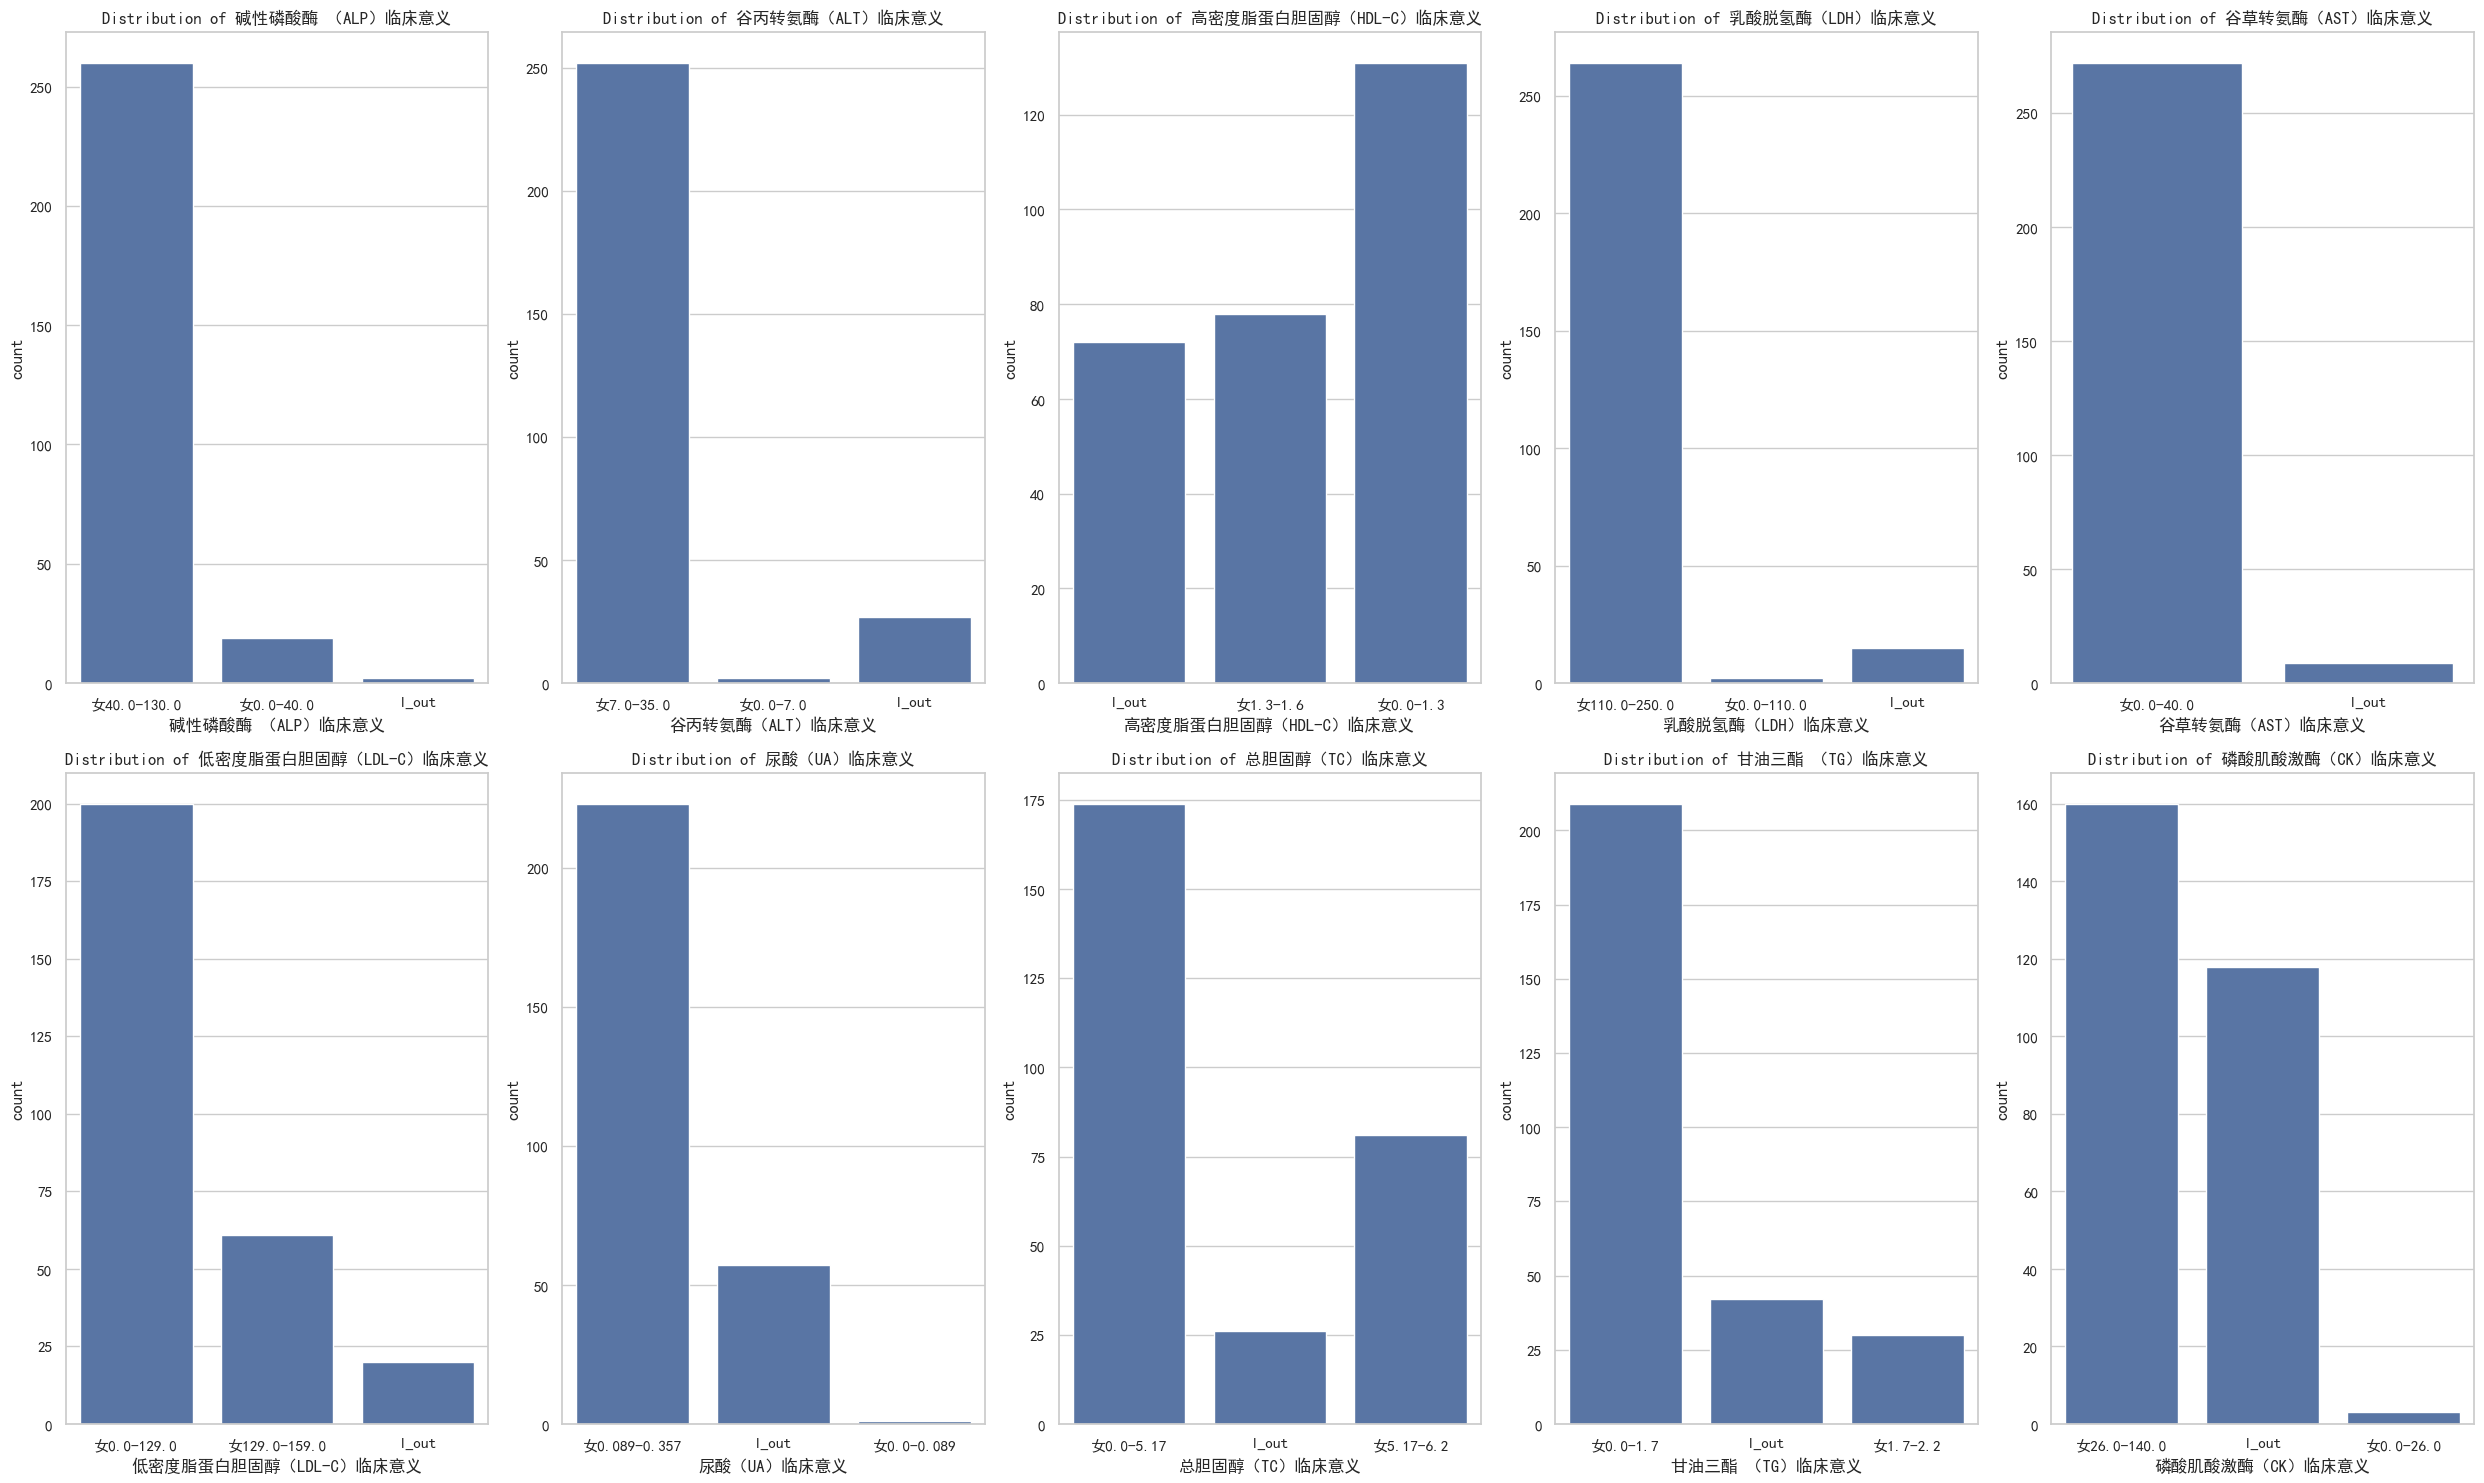

In [153]:
# class1的分析
df = df_to_clustering[df_to_clustering['Cluster']==2].copy()
df = df[column_all]

# 设置绘图风格
sns.set(style="whitegrid")
# 设置字体为支持中文的字体
rcParams['font.sans-serif'] = ['SimHei']  # 或者 'Microsoft YaHei'
rcParams['axes.unicode_minus'] = False  # 解决负号显示问题
# 创建一个绘图区域
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(25, 15))  # 根据需要调整行列数
axes = axes.flatten()

# 绘制每一列的条形图
for i, col in enumerate(df.columns):
    sns.countplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()


# 随机森林利用交互特征

In [154]:
import shap
import pandas as pd
from itertools import combinations
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np
from sklearn.metrics import r2_score  

In [164]:
def create_feature_combinations(features, min_size=2):
    """
    生成所有特征的组合
    :param features: 特征列表
    :param min_size: 最小组合大小
    :return: 特征组合列表
    """
    combinations_list = []
    for size in range(min_size, len(features) + 1):
        combinations_list.extend(combinations(features, size))
    return combinations_list

def create_combined_features(df, feature_combinations):
    """
    创建包含特征组合的新特征
    :param df: 数据框
    :param feature_combinations: 特征组合
    :return: 添加了组合特征的数据框
    """
    for combo in feature_combinations:
        df['_'.join(combo)] = df[list(combo)].astype(str).agg('_'.join, axis=1)
    return df

def random_features(df, features, target='AR_K_Mon'):
    """
    计算特征组合对目标变量的重要性
    :param df: 数据框
    :param features: 特征列表
    :param target: 目标变量
    :return: 特征组合的重要性数据框
    """
    # 生成所有特征的组合
    feature_combinations = create_feature_combinations(features)

    # 创建包含特征组合的新特征
    df_combined = create_combined_features(df.copy(), feature_combinations)
    print(df_combined)

    # 选择特征和目标变量
    combined_feature_names = ['_'.join(combo) for combo in feature_combinations]
    X_combined = df_combined[combined_feature_names]
    y = df_combined[target]

    # 创建数据预处理和模型管道
    preprocessor = ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(handle_unknown='ignore'), combined_feature_names)
        ]
    )

    model_combined = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', RandomForestRegressor(n_estimators=50, random_state=2024))
    ])

    # 切分数据
    X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.3, random_state=2024)

    # 训练模型
    model_combined.fit(X_train, y_train)

    # 转换为稠密矩阵
    X_train_transformed = model_combined.named_steps['preprocessor'].transform(X_train).toarray()
    X_test_transformed = model_combined.named_steps['preprocessor'].transform(X_test).toarray()

    # 计算 SHAP 值
    explainer = shap.Explainer(model_combined.named_steps['regressor'], X_train_transformed)
    shap_values = explainer(X_test_transformed)

    # 可视化 SHAP 值
    feature_names = model_combined.named_steps['preprocessor'].transformers_[0][1].get_feature_names_out()
    shap.summary_plot(shap_values, X_test_transformed, feature_names=feature_names)


    # 计算特征重要性
    importances_combined = model_combined.named_steps['regressor'].feature_importances_

    # 生成重要性数据框
    feature_importances_combined = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances_combined
    })

    # 按重要性排序
    feature_importances_combined = feature_importances_combined.sort_values(by='Importance', ascending=False)


    # 预测测试集  
    y_pred = model_combined.predict(X_test)  

    # 计算R^2分数  
    r2 = r2_score(y_test, y_pred) 
    print(r2)

    return feature_importances_combined



             患者编号        检查日期 性别  转换后的碱性磷酸酶 （ALP） 碱性磷酸酶 （ALP）临床意义  \
0    202310160013  2023-08-10  女            50.00     女40.0-130.0   
1    202310090010  2023-08-04  男            54.00     男40.0-130.0   
2    202309260001  2023-02-02  男            59.00     男40.0-130.0   
3    202309120003  2023-05-09  男            53.00     男40.0-130.0   
4    202309110012  2023-09-15  男            89.17     男40.0-130.0   
..            ...         ... ..              ...             ...   
751  202011180001  2018-01-08  女            78.00     女40.0-130.0   
752  202011170005  2019-02-19  男            53.00     男40.0-130.0   
753  202011170003  2021-02-06  男            60.00     男40.0-130.0   
754  202011170003  2020-04-21  男            43.00     男40.0-130.0   
755  202009170003  2018-11-30  男            70.00     男40.0-130.0   

     转换后的谷丙转氨酶（ALT） 谷丙转氨酶（ALT）临床意义  转换后的高密度脂蛋白胆固醇（HDL-C） 高密度脂蛋白胆固醇（HDL-C）临床意义  \
0             17.00      女7.0-35.0                  1.92                l_out   
1        

D:\asl\venv\Lib\site-packages\shap\plots\_beeswarm.py:950: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  pl.tight_layout()


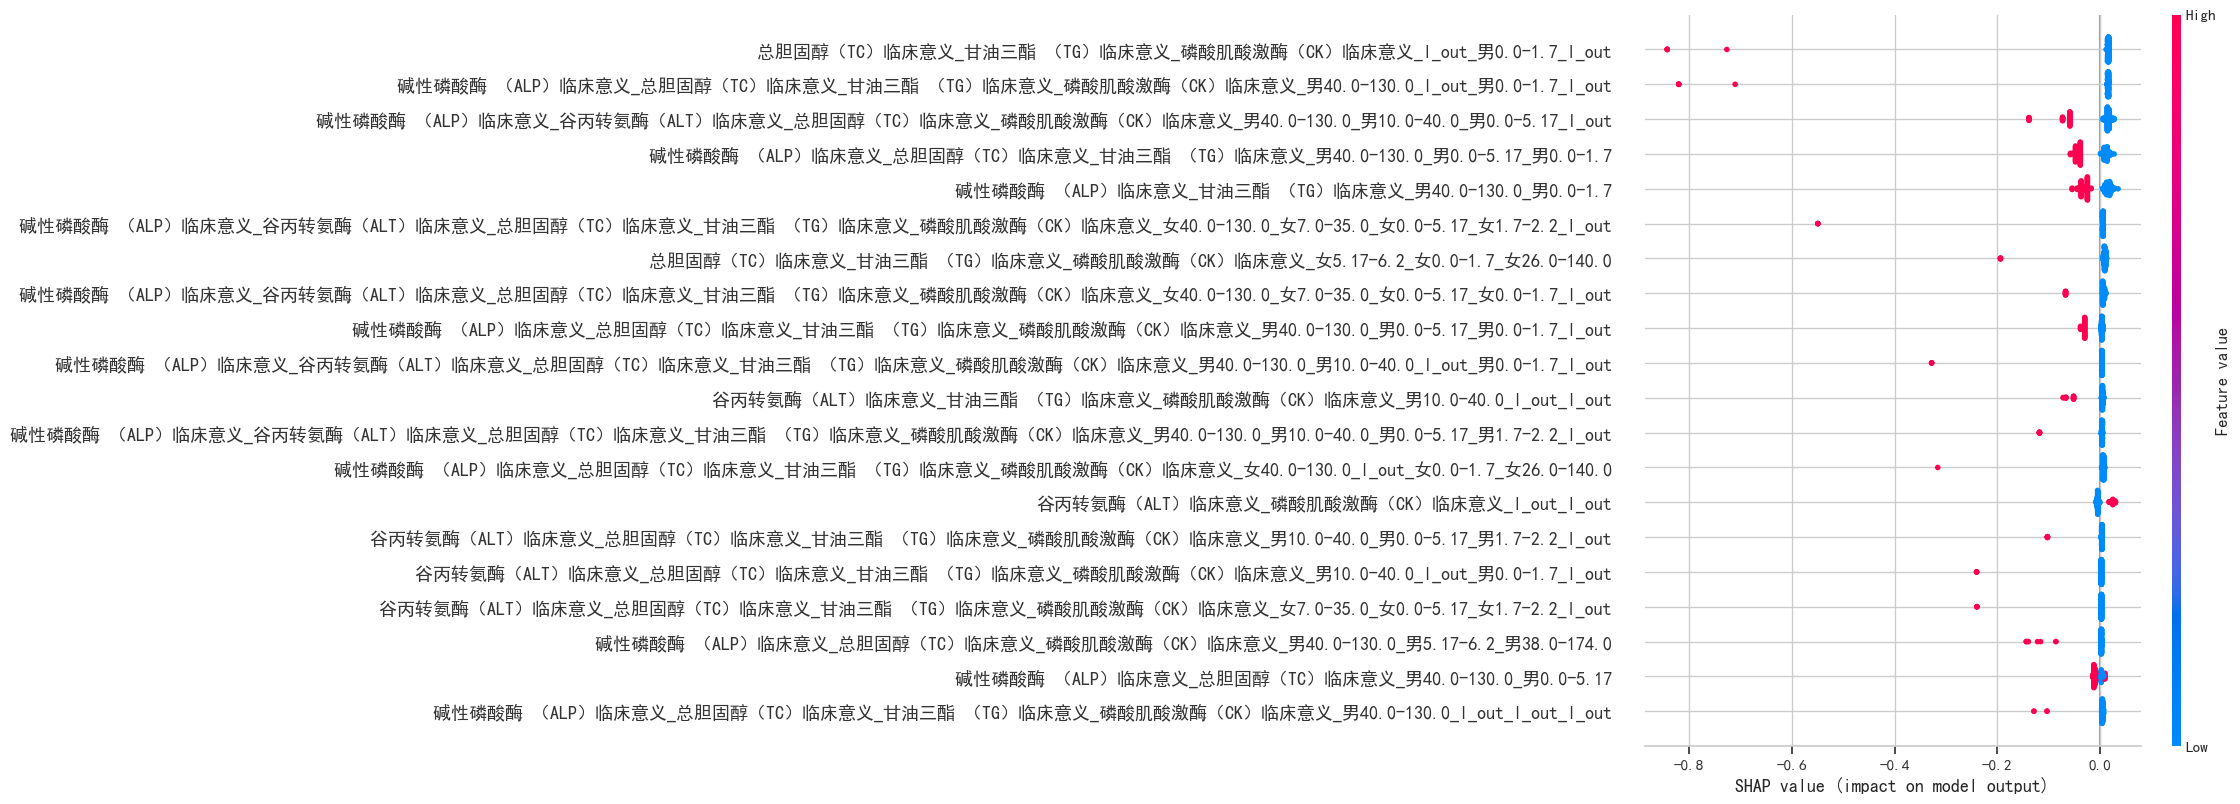

-0.18647770173990885


,Feature,Importance
721,碱性磷酸酶 （ALP）临床意义_谷丙转氨酶（ALT）临床意义_总胆固醇（TC）临床意义_甘油...,0.051886
589,碱性磷酸酶 （ALP）临床意义_总胆固醇（TC）临床意义_甘油三酯 （TG）临床意义_磷酸肌...,0.047346
389,总胆固醇（TC）临床意义_甘油三酯 （TG）临床意义_磷酸肌酸激酶（CK）临床意义_l_ou...,0.044156
711,碱性磷酸酶 （ALP）临床意义_谷丙转氨酶（ALT）临床意义_总胆固醇（TC）临床意义_甘油...,0.029728
564,碱性磷酸酶 （ALP）临床意义_总胆固醇（TC）临床意义_甘油三酯 （TG）临床意义_磷酸肌...,0.026620
...,...,...
703,碱性磷酸酶 （ALP）临床意义_谷丙转氨酶（ALT）临床意义_总胆固醇（TC）临床意义_甘油...,0.000000
704,碱性磷酸酶 （ALP）临床意义_谷丙转氨酶（ALT）临床意义_总胆固醇（TC）临床意义_甘油...,0.000000
714,碱性磷酸酶 （ALP）临床意义_谷丙转氨酶（ALT）临床意义_总胆固醇（TC）临床意义_甘油...,0.000000
722,碱性磷酸酶 （ALP）临床意义_谷丙转氨酶（ALT）临床意义_总胆固醇（TC）临床意义_甘油...,0.000000


In [165]:
random_features(df_to_clustering,features2)

结论：特征之间组合效应不明显，无法看到血生化检测指标与ar斜率之间存在强关系